### Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data Reading and Understanding

In [3]:
# reading the dataset
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.shape

(1460, 81)

In [7]:
# To get the description of the dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

### Data Quality Checks

In [8]:
# Checking for Duplicate rows in the dataset.
duplicate_rows = df.duplicated(subset=None, keep='first').sum()
print(duplicate_rows)

#observation: There is no duplicate row present

0


In [9]:
# Cheking details of columns if the they are nulls or blanks as value.
(df.isnull().sum()*100)/len(df)

#observation: Many Columns have null values

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [10]:

# Checking the number of columns which have NA values
len(df.columns[df.isna().all()].tolist())

#observation: No column is present which has NA value

0

In [11]:
#check which column has constant values
constant_columns = df.columns[df.nunique() <= 1].values.tolist()
constant_columns

#observation: No column has constant value

[]

### Data Cleaning - Handling null and missing values

In [12]:
# Checking for null values percentage
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType       59.73
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [13]:
# sort the column based on null values
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [14]:
# List of columns with missing values >70%
miss_cols=df.columns[(df.isnull().sum()/len(df)*100>70)]
miss_cols


Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [15]:
#Drop columns with missing values >70%
df.drop(miss_cols,axis=1, inplace=True)
df.shape


(1460, 77)

In [16]:
# According to the data dictionary provided, the nulls in these columns indicates the absence of facility which may affect the price
# Hence, we will first impute the categorical variables with 'None'
null_with_meaning = ["MasVnrType","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtCond","BsmtQual"]
for i in null_with_meaning:
    df[i].fillna("None", inplace=True)

In [17]:
# sort the column based on null values
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [18]:
# Will check these columns one by one
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [19]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [20]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [21]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [22]:
# As LotFrontage is numeric data which can be easily imputed from the available to its neighborhood.
# Using Median values to impute it

df['LotFrontage'] = df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [23]:
# Similarly, imputing other values as well
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

In [24]:
# dropping rows where electrical values are not available
df.dropna(subset=["Electrical"], inplace=True)

In [25]:
# Removing ID column, as it is not needed
df = df.drop(['Id'], axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0        None     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3          Gd             7

In [26]:
# sort the column based on null values
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

Series([], dtype: float64)

In [27]:
# Check the no. of rows retained
df.shape

(1459, 76)

### EDA - Data Visulaization

In [28]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [29]:
# Removing ID column, as it is not needed
# df_numeric = df_numeric.drop(['Id'], axis=1)
# df_numeric.head()

### Target variable vs  few selected predcitors

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

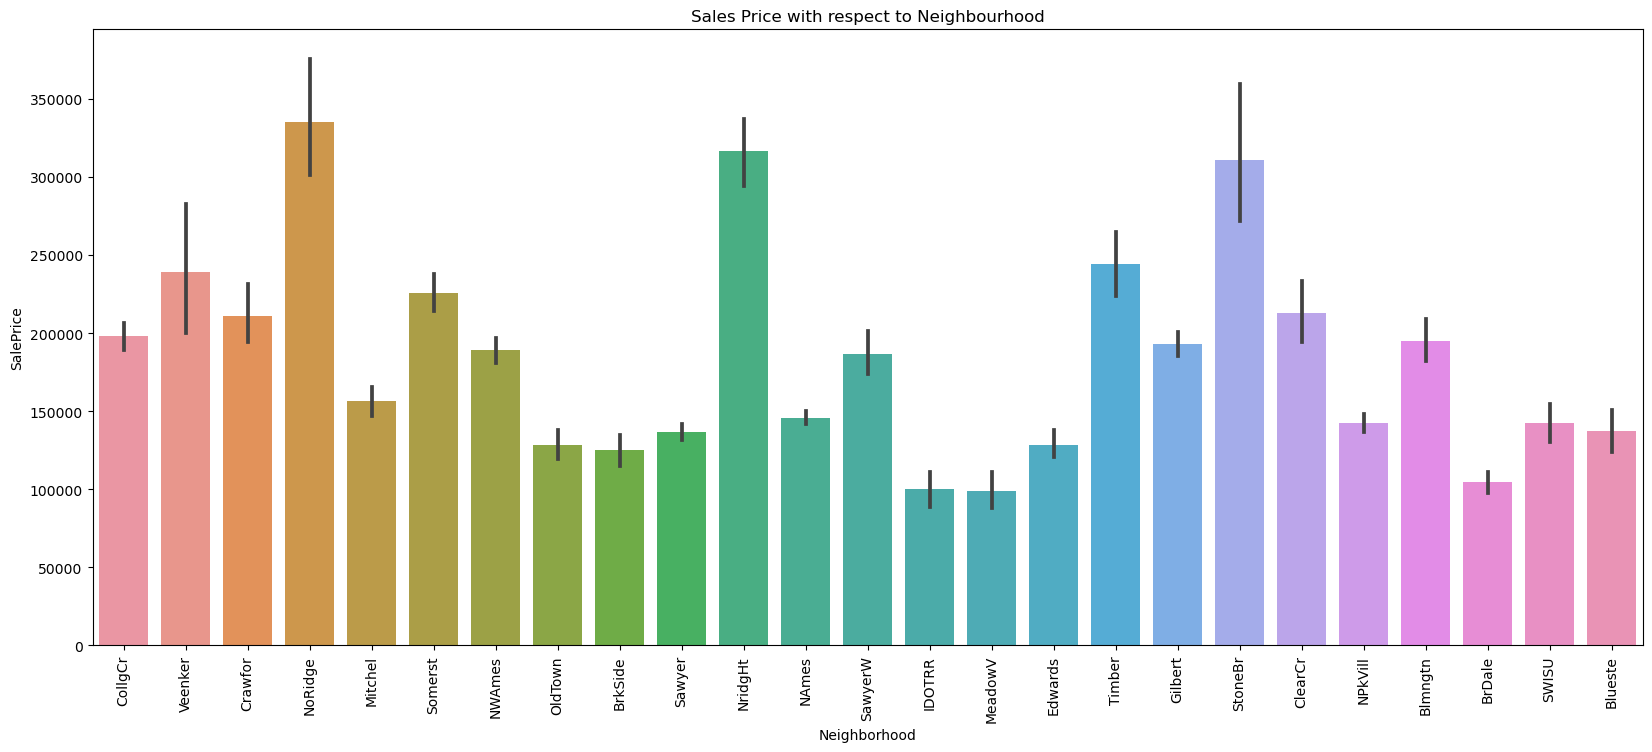

In [30]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

In [31]:
# Observation: Properties prices are very in few of neihborhoods

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

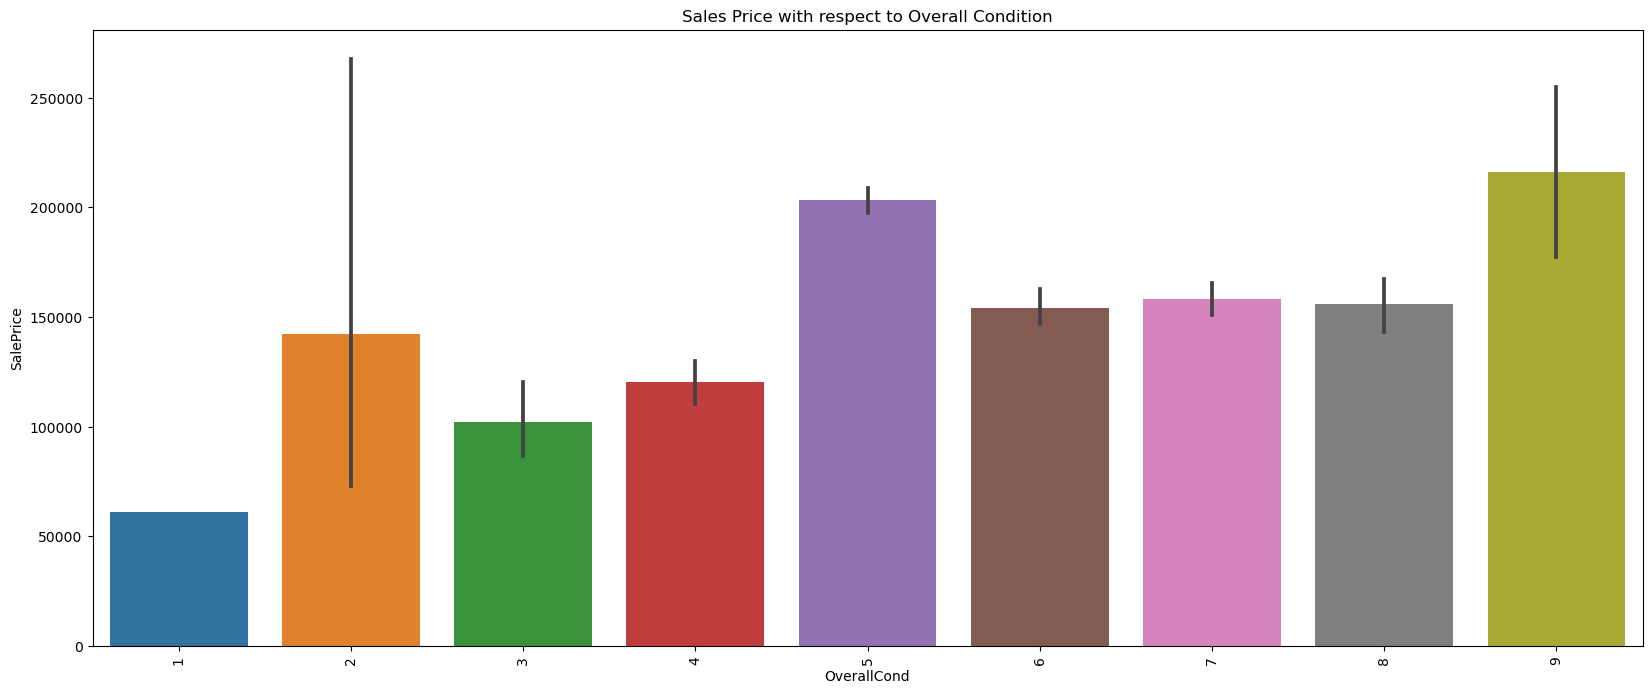

In [32]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

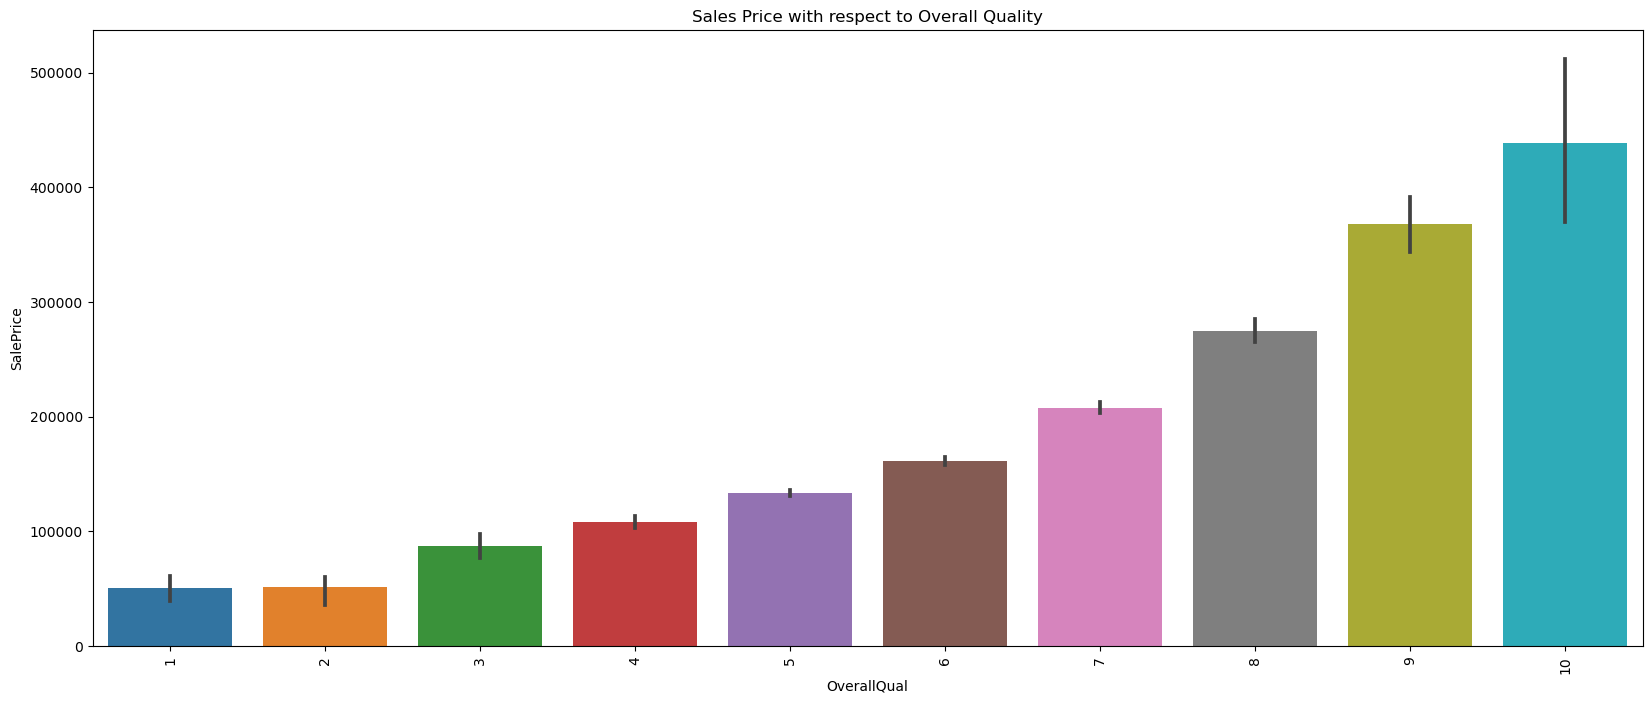

In [33]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

In [34]:
# Observation: With increase in quality price is also increasing which is direct positive relation with sales price

In [35]:
# correlation matrix
corr = df_numeric.corr()
corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.370454 -0.139766     0.032936    -0.059134   
LotFrontage     -0.370454     1.000000  0.335967     0.239667    -0.043555   
LotArea         -0.139766     0.335967  1.000000     0.105786    -0.005665   
OverallQual      0.032936     0.239667  0.105786     1.000000    -0.092243   
OverallCond     -0.059134    -0.043555 -0.005665    -0.092243     1.000000   
YearBuilt        0.027435     0.120956  0.014296     0.573334    -0.375780   
YearRemodAdd     0.040199     0.084492  0.013852     0.551605     0.074158   
MasVnrArea       0.023792     0.195901  0.103302     0.407075    -0.125922   
BsmtFinSF1      -0.069501     0.232736  0.214121     0.239265    -0.046595   
BsmtFinSF2      -0.065549     0.052264  0.111158    -0.059291     0.040132   
BsmtUnfSF       -0.140627     0.119217 -0.002641     0.308018    -0.137008   
TotalBsmtSF     -0.238160     0.381480  0.260962     0.537523    -0.171796   
1stFlrSF        -0.251484     0.434368  0.299533     0.475933    -0.144646   
2ndFlrSF         0.307713     0.075641  0.051030     0.295969     0.029187   
LowQualFinSF     0.046524     0.031884  0.004773    -0.030502     0.025454   
GrLivArea        0.074949     0.385219  0.263109     0.593021    -0.079777   
BsmtFullBath     0.003799     0.107321  0.158147     0.110700    -0.055250   
BsmtHalfBath    -0.002243     0.006641  0.048034    -0.040291     0.117749   
FullBath         0.131354     0.186534  0.126100     0.551267    -0.193929   
HalfBath         0.177004     0.054113  0.014333     0.274328    -0.060371   
BedroomAbvGr    -0.023502     0.245222  0.119700     0.101789     0.013039   
KitchenAbvGr     0.281833    -0.005609 -0.017796    -0.184040    -0.087085   
TotRmsAbvGrd     0.040274     0.332606  0.190037     0.427720    -0.057485   
Fireplaces      -0.045232     0.249455  0.271398     0.396455    -0.024167   
GarageYrBlt      0.081000     0.062309 -0.025813     0.515236    -0.306031   
GarageCars      -0.040232     0.281378  0.154893     0.600991    -0.185670   
GarageArea      -0.098558     0.339130  0.180392     0.561980    -0.151662   
WoodDeckSF      -0.012598     0.088733  0.171701     0.239000    -0.003318   
OpenPorchSF     -0.005838     0.141819  0.084751     0.308554    -0.032847   
EnclosedPorch   -0.011904     0.008088 -0.018360    -0.114162     0.070238   
3SsnPorch       -0.043786     0.064665  0.020417     0.030314     0.025465   
ScreenPorch     -0.025932     0.041087  0.043147     0.064755     0.054721   
PoolArea         0.008309     0.174574  0.077669     0.065143    -0.002009   
MiscVal         -0.007651     0.005340  0.038063    -0.031461     0.068752   
MoSold          -0.013404     0.007413  0.001179     0.070570    -0.003685   
YrSold          -0.021461     0.004744 -0.014254    -0.027277     0.044003   
SalePrice       -0.084230     0.349895  0.263837     0.791069    -0.077924   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027435      0.040199    0.023792   -0.069501   -0.065549   
LotFrontage     0.120956      0.084492    0.195901    0.232736    0.052264   
LotArea         0.014296      0.013852    0.103302    0.214121    0.111158   
OverallQual     0.573334      0.551605    0.407075    0.239265   -0.059291   
OverallCond    -0.375780      0.074158   -0.125922   -0.046595    0.040132   
YearBuilt       1.000000      0.592512    0.312227    0.250465   -0.048903   
YearRemodAdd    0.592512      1.000000    0.177038    0.129259   -0.067575   
MasVnrArea      0.312227      0.177038    1.000000    0.260989   -0.071453   
BsmtFinSF1      0.250465      0.129259    0.260989    1.000000   -0.050328   
BsmtFinSF2     -0.048903     -0.067575   -0.071453   -0.050328    1.000000   
BsmtUnfSF       0.149444      0.181520    0.113719   -0.495718   -0.209395   
TotalBsmtSF     0.393159      0.292546    0.359798    0.521963    0.104593   
1stFlrSF        0.283056      0.2413

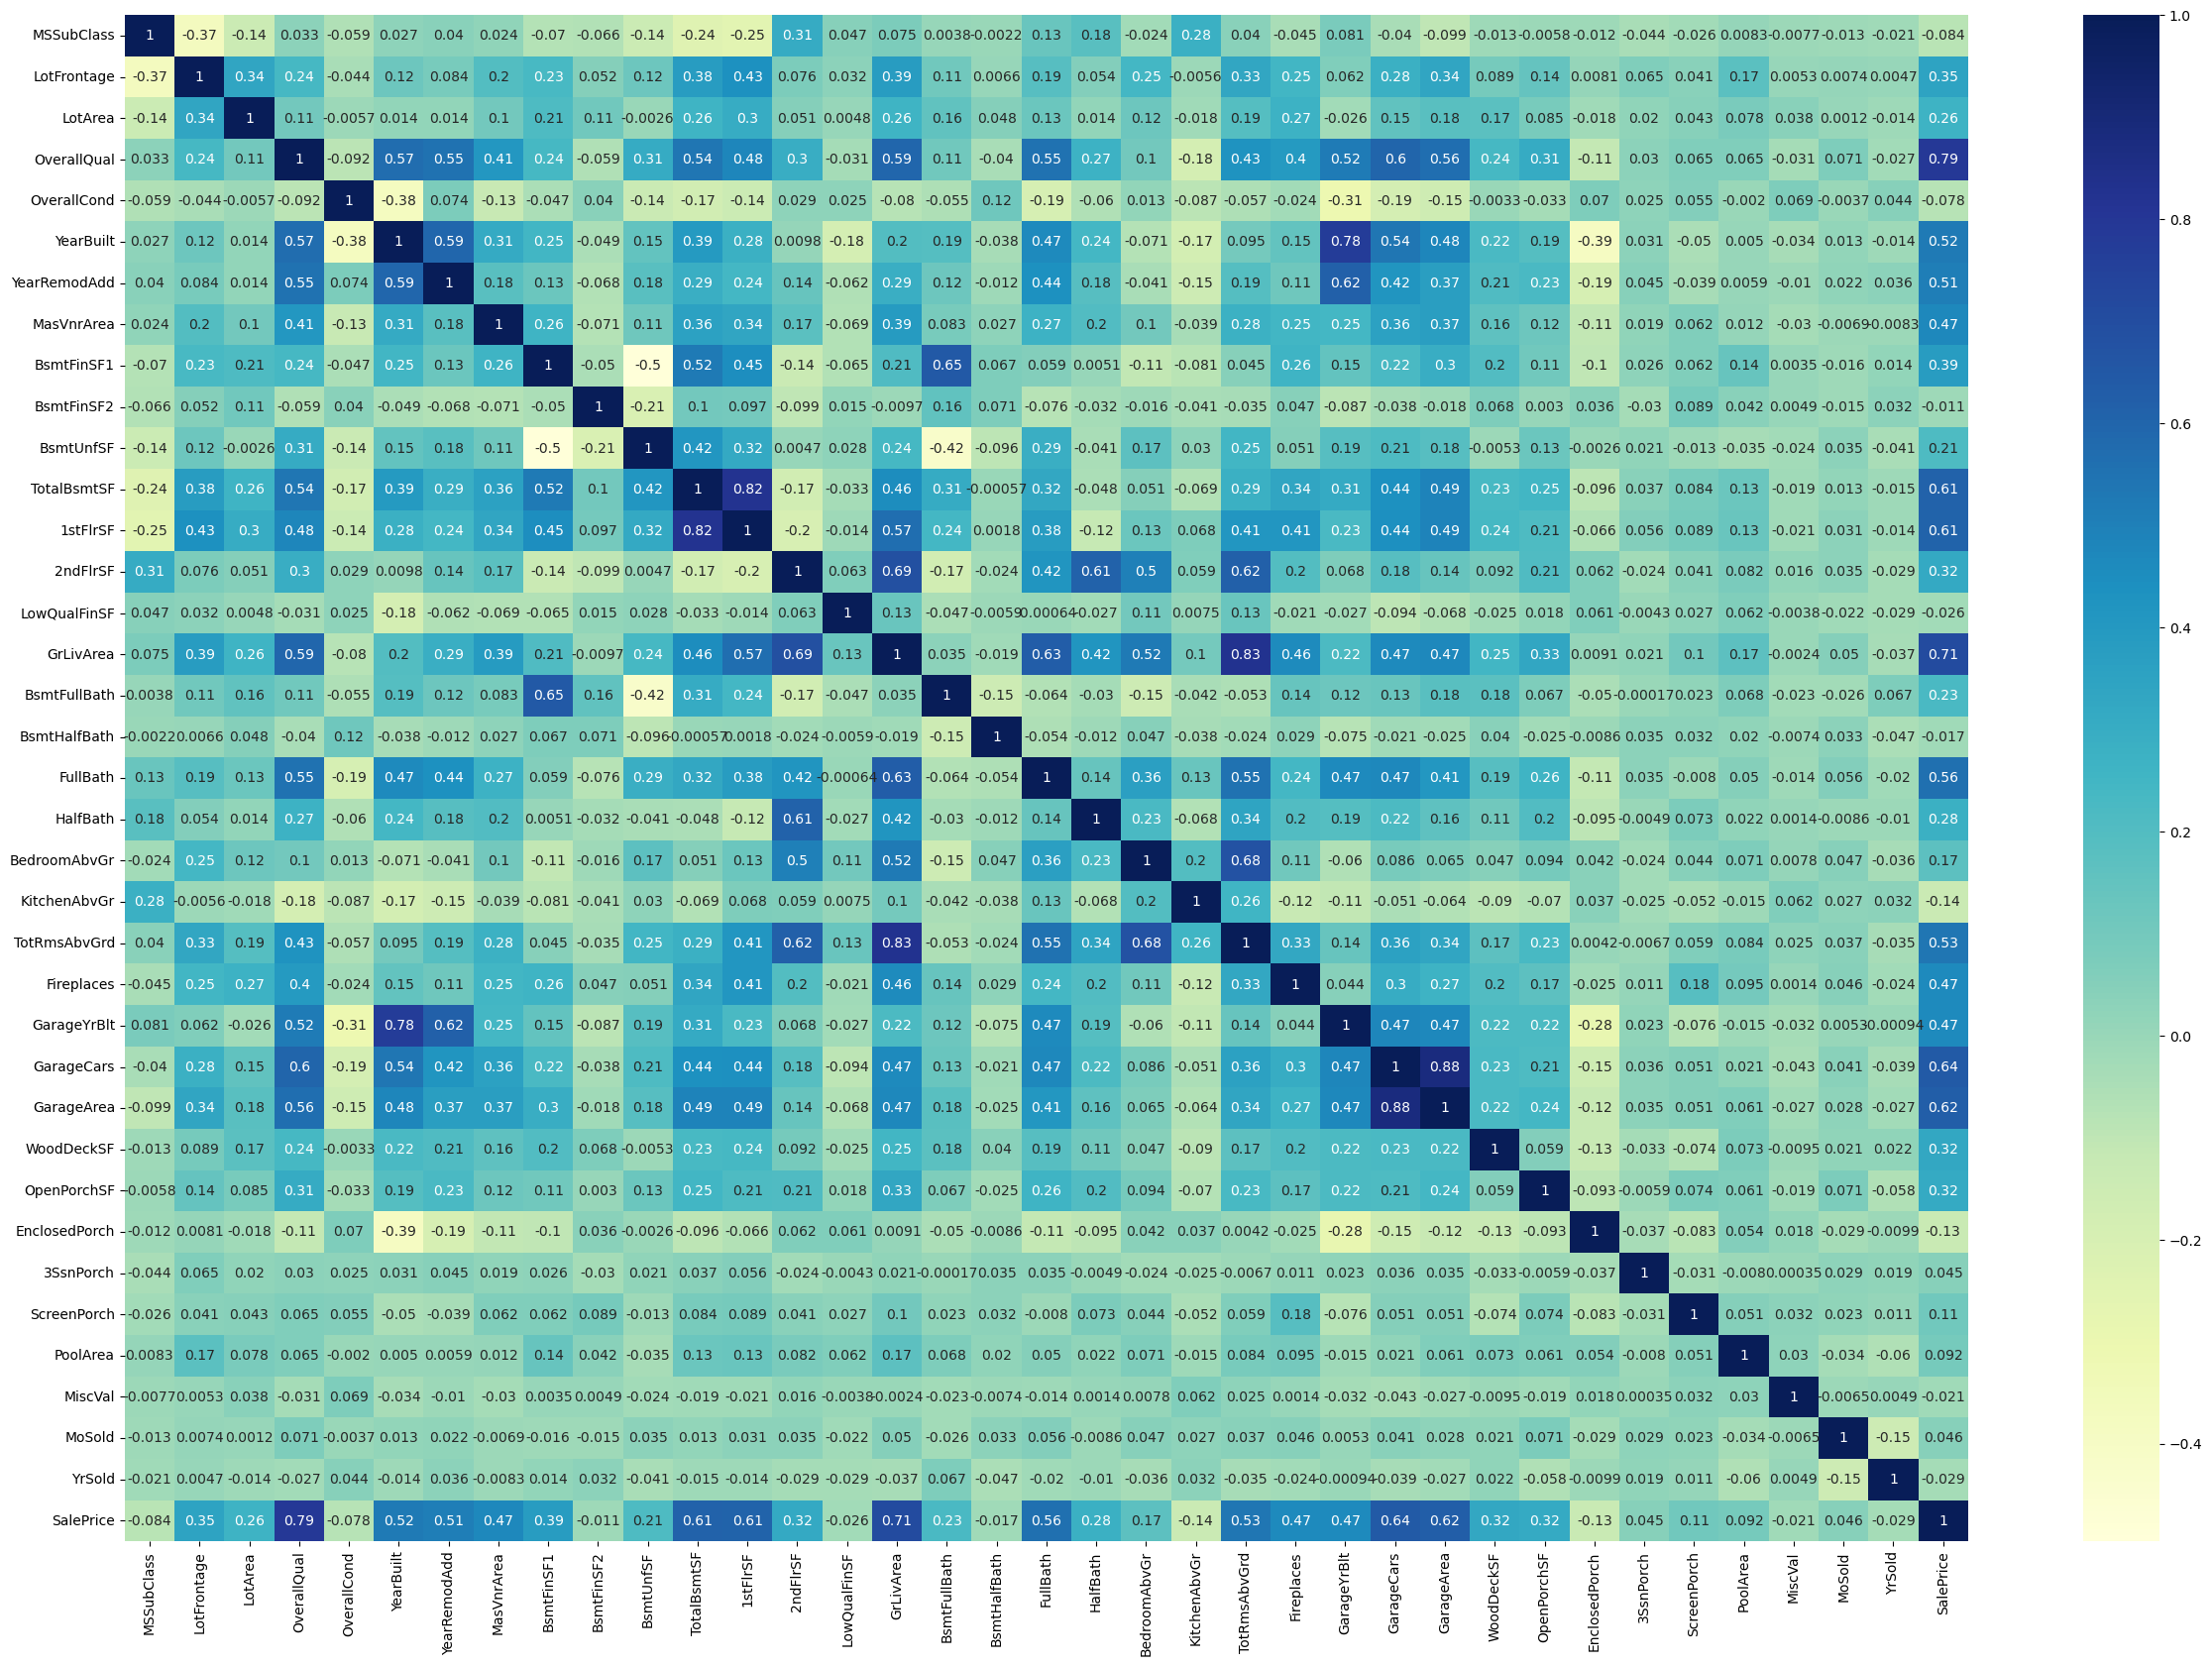

In [36]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

In [37]:
# Observation: As it can be seen in above correlation matrix, there are many higly correlated fetures present.
# 1stFlrSF and TotalBsmtSF
# TotRmsAbvGrd and GrLivArea
# GarageArea and GarageCars
# GarageYrBlt and YearBuilt

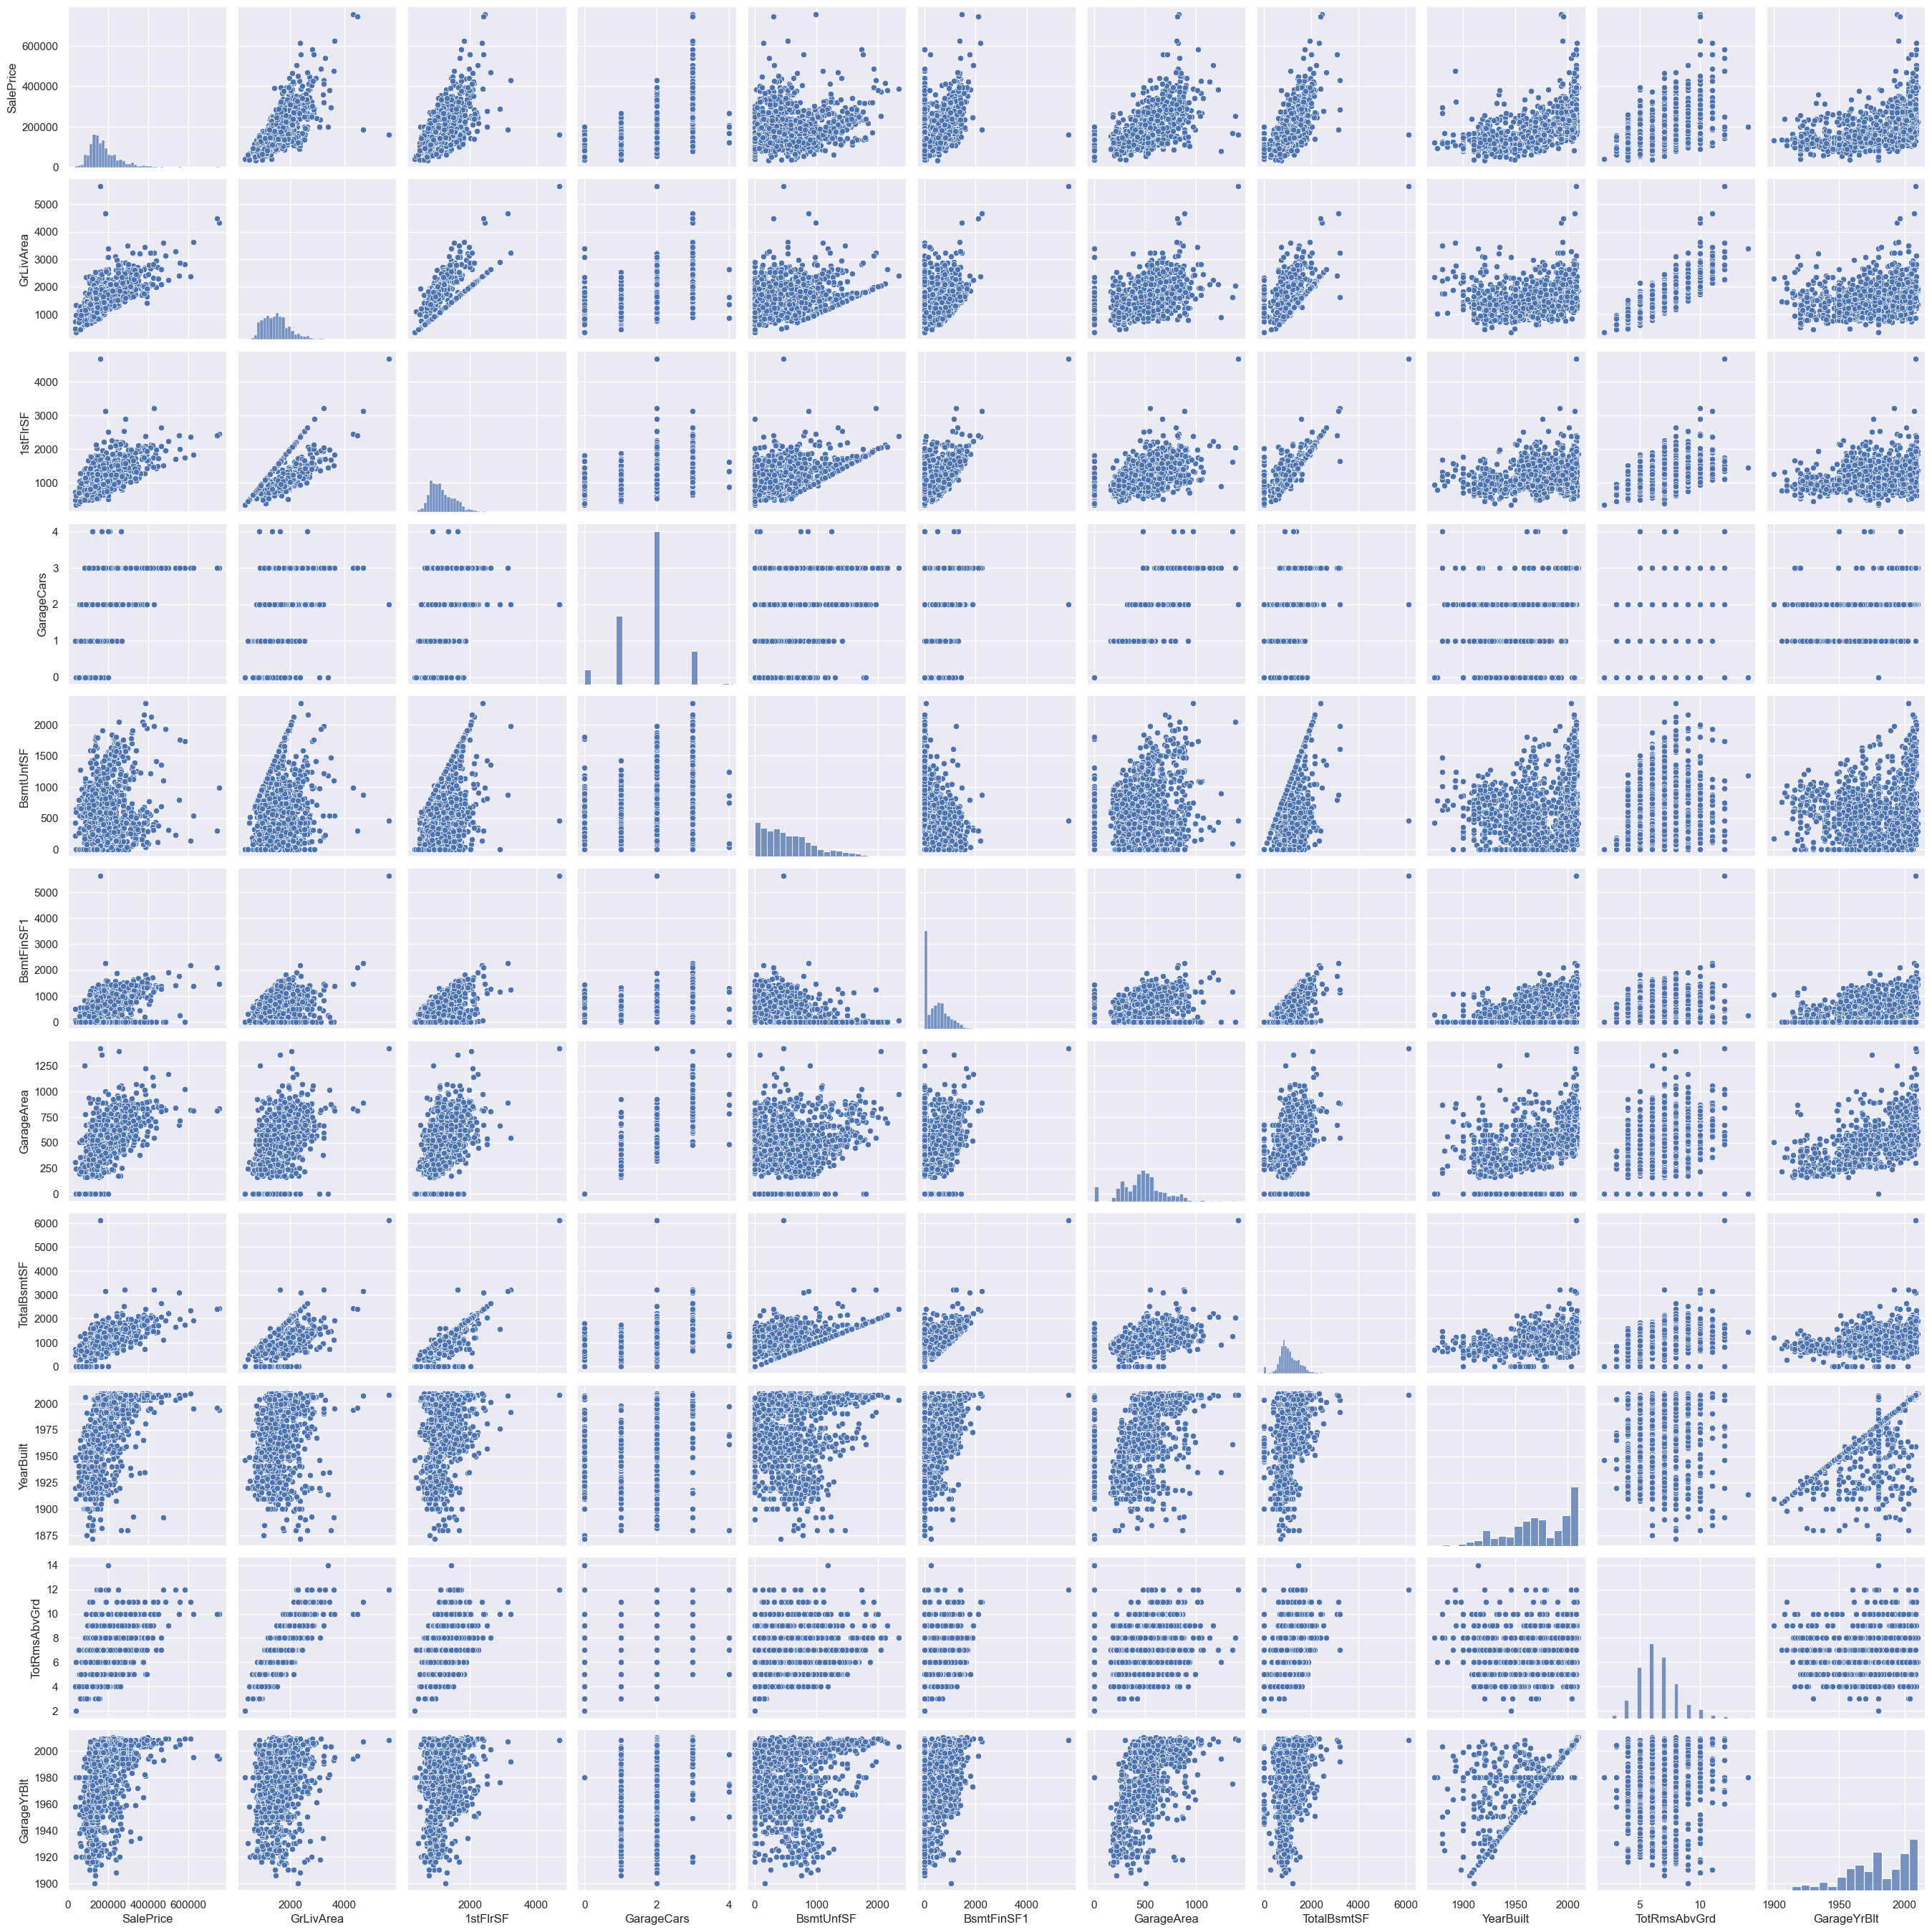

In [38]:
# Checking the same with a pairplot before dropping correlated feature columns
sns.set()
cols = ['SalePrice', 'GrLivArea', '1stFlrSF', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 2.5)
plt.show()

In [39]:
# Since there high correlation between feature column let's drop one of them
df = df.drop(['TotalBsmtSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)

In [40]:
df.shape

(1459, 72)

### Checking outliers 

In [41]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1459.000000  1459.000000    1459.000000  1459.000000  1459.000000   
mean     56.881426    70.197738   10517.363948     6.100069     5.575737   
std      42.310746    22.439474    9984.666267     1.383171     1.113079   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7549.000000     5.000000     5.000000   
50%      50.000000    70.000000    9477.000000     6.000000     5.000000   
75%      70.000000    80.000000   11603.000000     7.000000     6.000000   
90%     120.000000    92.000000   14388.400000     8.000000     7.000000   
95%     160.000000   104.000000   17402.300000     8.000000     8.000000   
99%     190.000000   137.420000   37593.680000    10.000000     9.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1459.000000   1459.000000  1459.000000  1459.000000  1459.000000   
mean   1971.244003   1984.850583   103.187800   443.943797    46.581220   
std      30.199555     20.644343   180.773158   456.106417   161.369977   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   384.000000     0.000000   
75%    2000.000000   2004.000000   164.500000   712.500000     0.000000   
90%    2006.000000   2006.000000   335.000000  1066.000000   117.400000   
95%    2007.000000   2007.000000   456.000000  1274.000000   396.400000   
99%    2009.000000   2009.000000   791.360000  1572.420000   830.560000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1459.000000  1459.000000  1459.000000   1459.000000  1459.000000   
mean    567.366004  1162.906785   346.791638      5.848526  1515.546950   
std     441.992392   386.572089   436.610637     48.639512   525.650927   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     223.000000   882.000000     0.000000      0.000000  1129.000000   
50%     479.000000  1088.000000     0.000000      0.000000  1464.000000   
75%     808.000000  1391.500000   728.000000      0.000000  1777.500000   
90%    1232.000000  1680.000000   954.400000      0.000000  2158.600000   
95%    1468.000000  1831.500000  1141.100000      0.000000  2466.200000   
99%    1797.100000  2219.520000  1419.040000    360.000000  3123.760000   
max    2336.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1459.000000   1459.000000  1459.000000  1459.000000   1459.000000   
mean       0.425634      0.057574     1.564770     0.382454      2.866347   
std        0.518969      0.238830     0.550987     0.502798      0.816050   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
90%        1.000000      0.000000     2.000000     1.000000      4.000000   
95%        1.000000      1.000000     2.000000     1.000000      4.000000   
99%        2.000000      1.000000     3.000000     1.000000      5.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr   Fireplaces   GarageArea   WoodDeckSF  OpenPorchSF  \
count   1459.000000  1459.000000  1459.000000  1459.000000  1459.000000   
mean       1.046607     0.613434   473.030158    94.240576    46.692255   
std        0.220410     0.644687   213.869604   125.381679    66.267472   
min        0.000000     0.000000     0.000000     0.000000     0.000

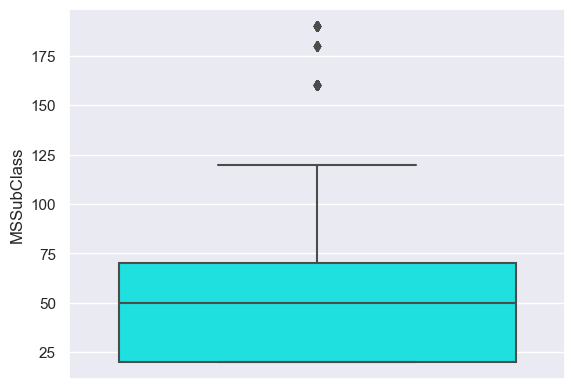

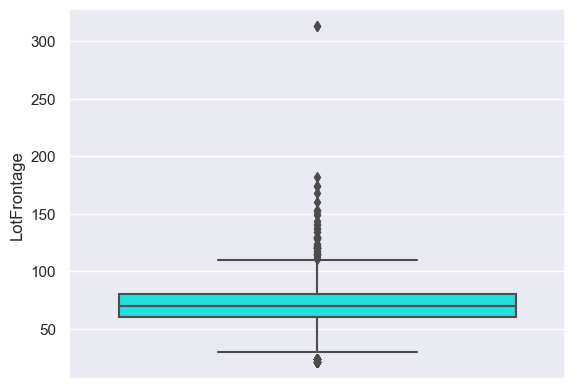

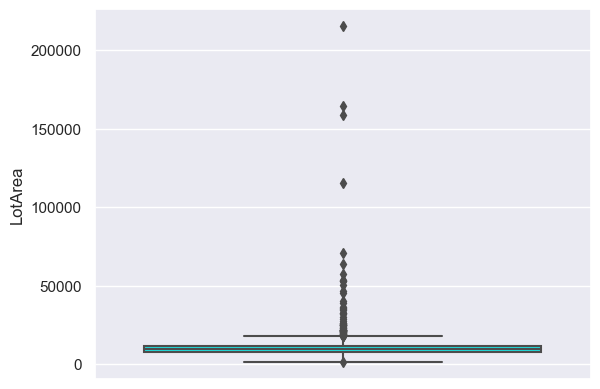

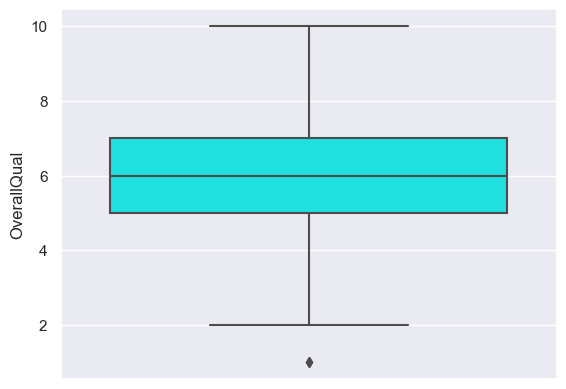

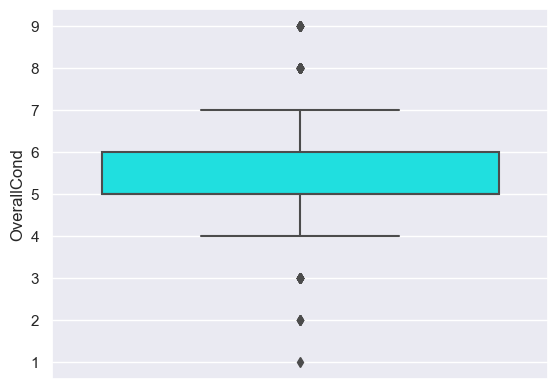

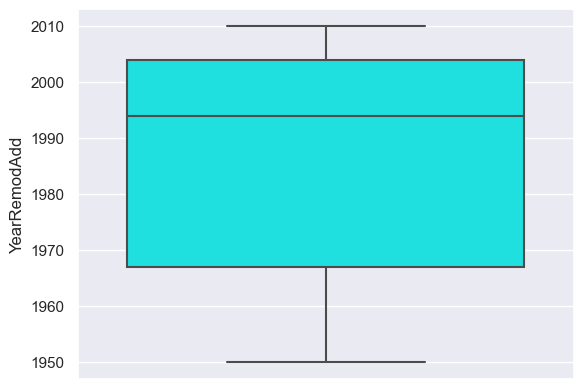

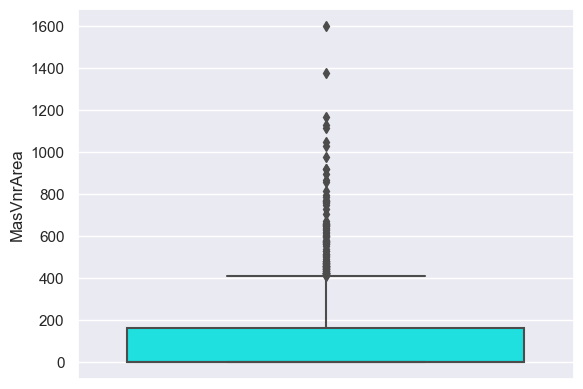

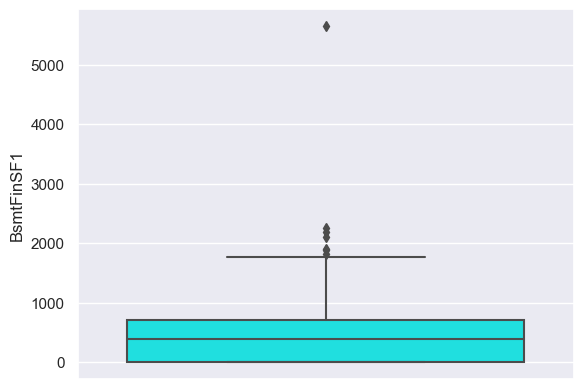

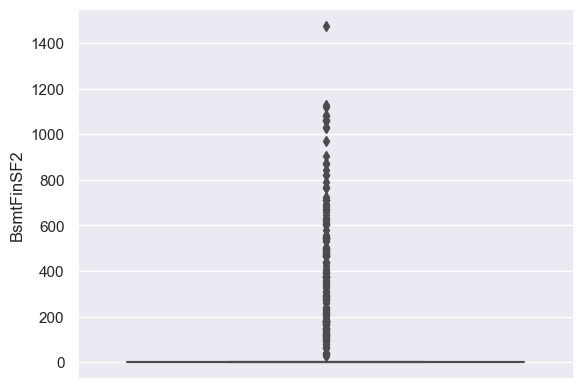

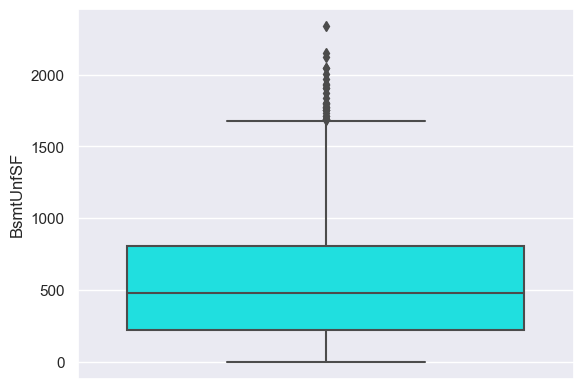

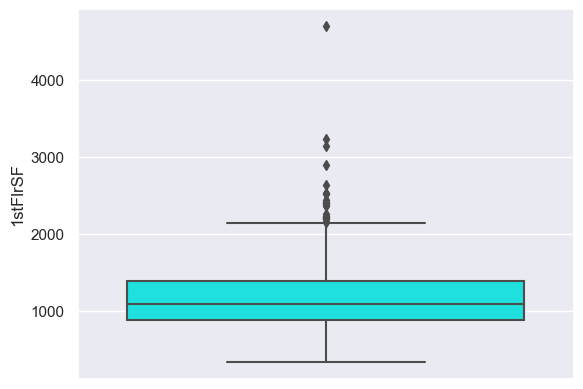

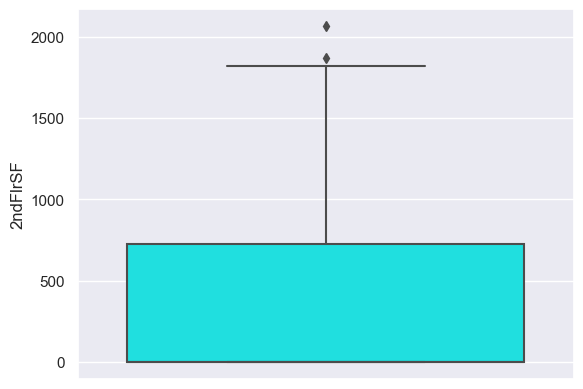

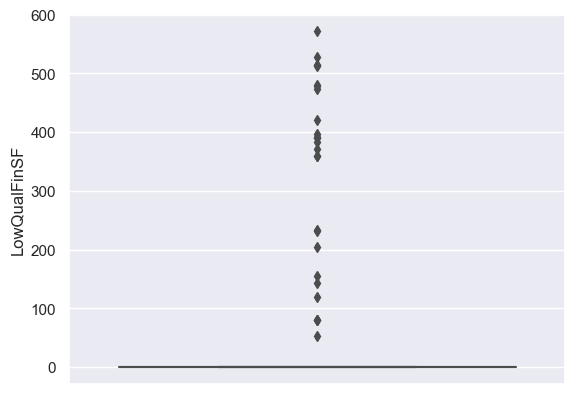

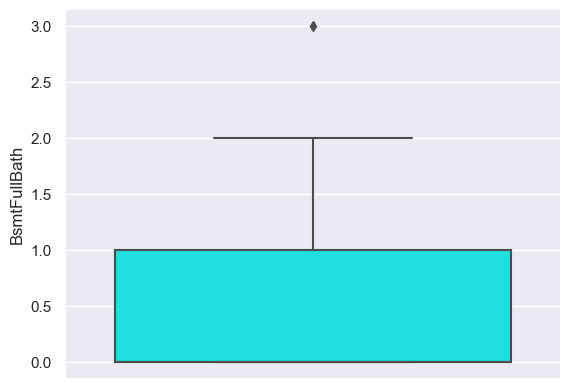

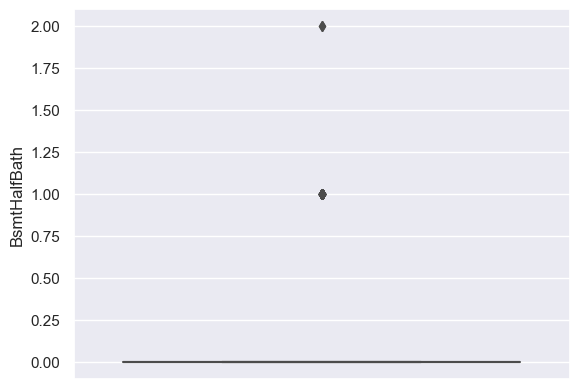

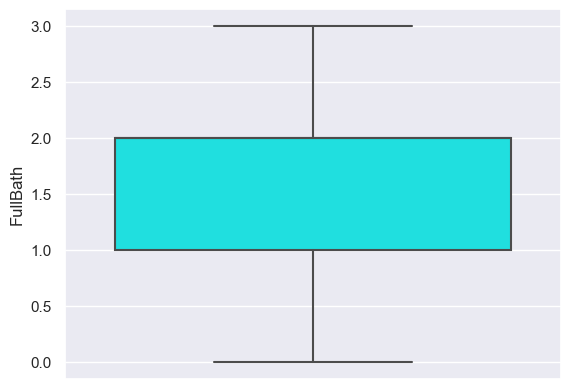

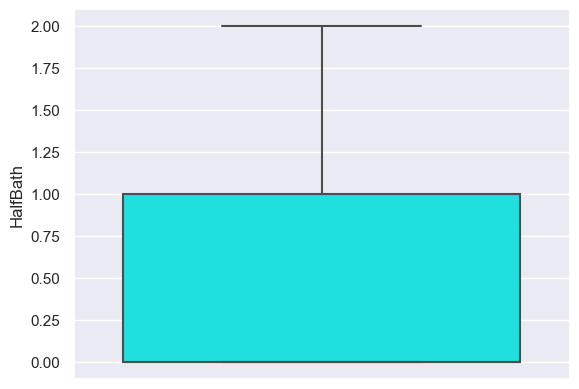

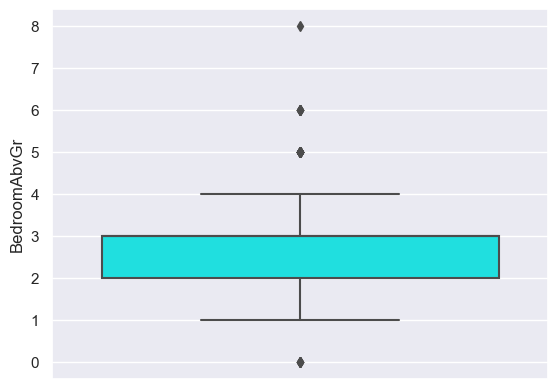

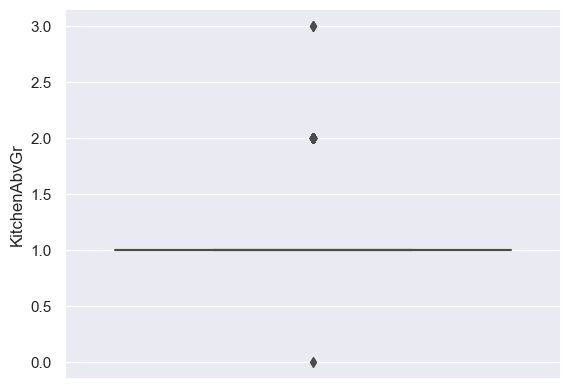

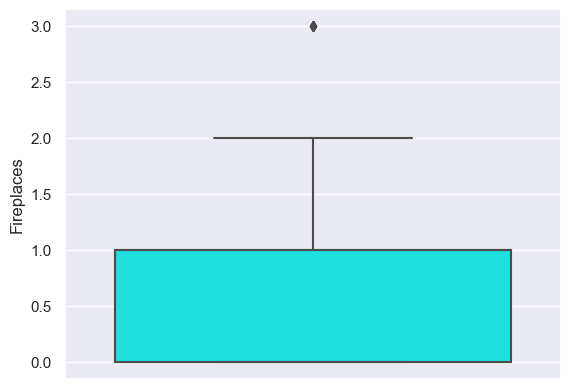

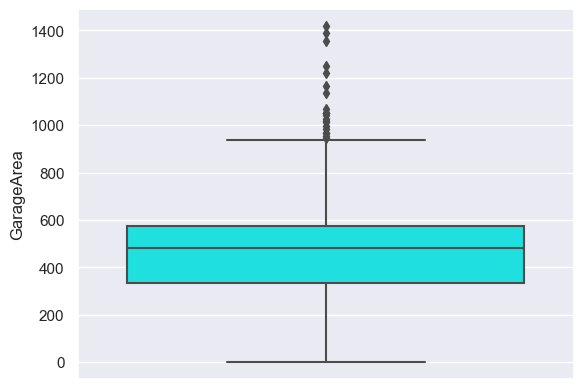

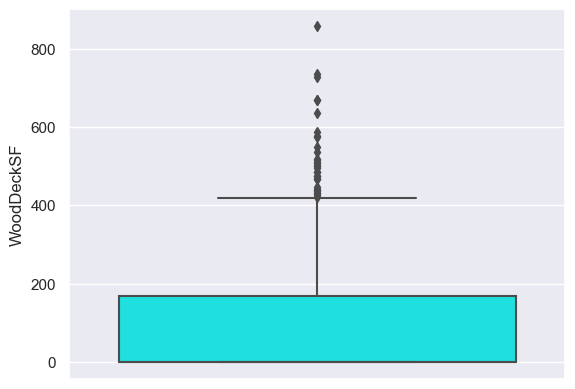

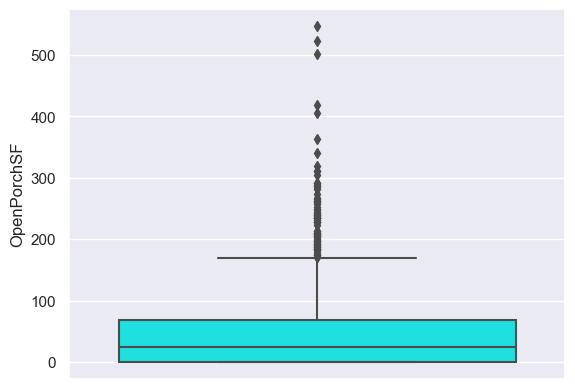

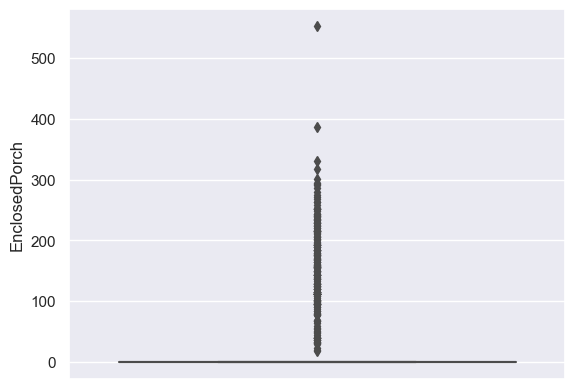

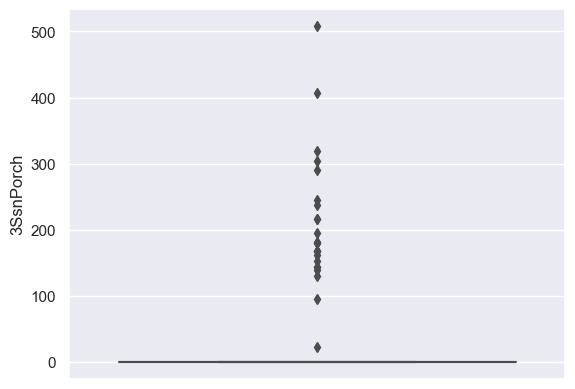

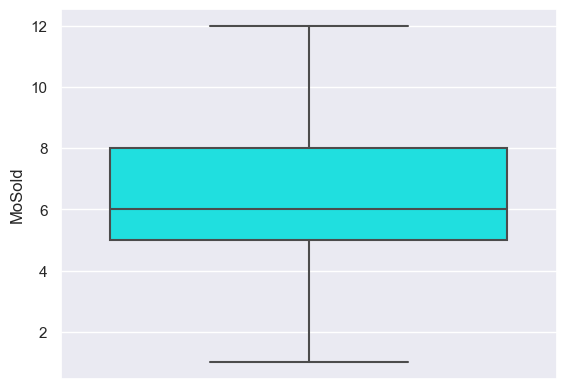

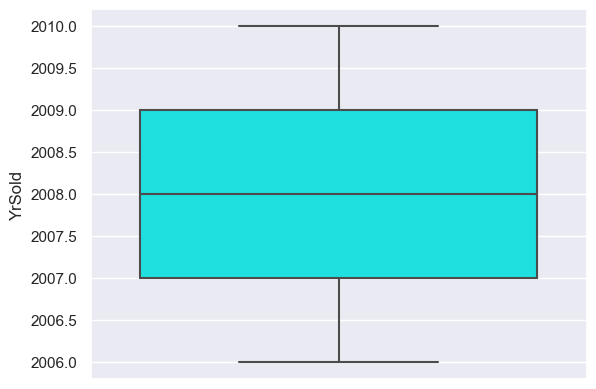

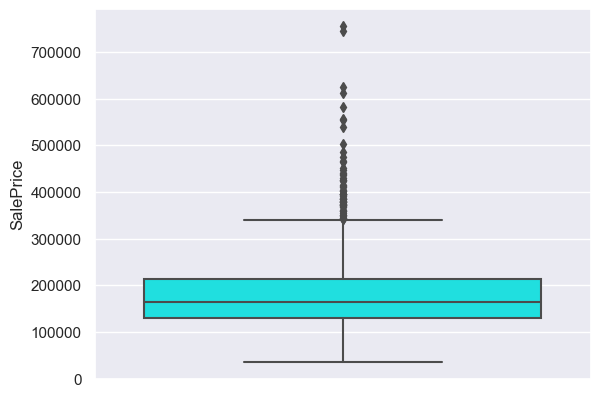

In [42]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Boxplot to visualize outliers
for column in num_cols:
    sns.boxplot(y=df[column],color="cyan")
    plt.show()

In [43]:
# IQR to remove outliers

Q1 = df[num_cols].quantile(0.05)
Q3 = df[num_cols].quantile(0.95)
IQR = Q3 - Q1

df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |(df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [44]:
df.shape

(1265, 72)

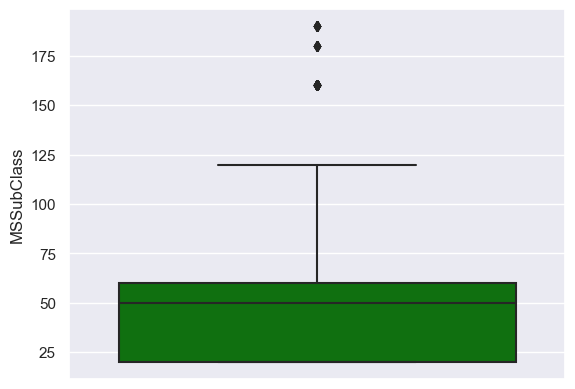

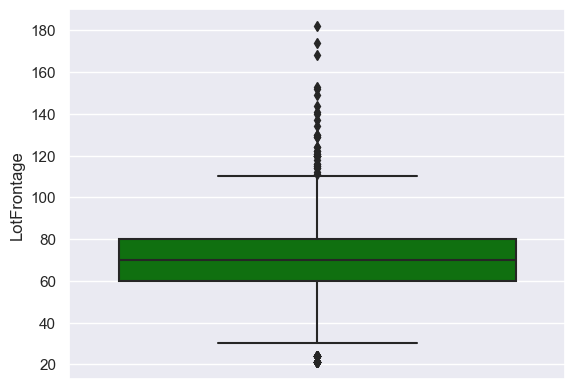

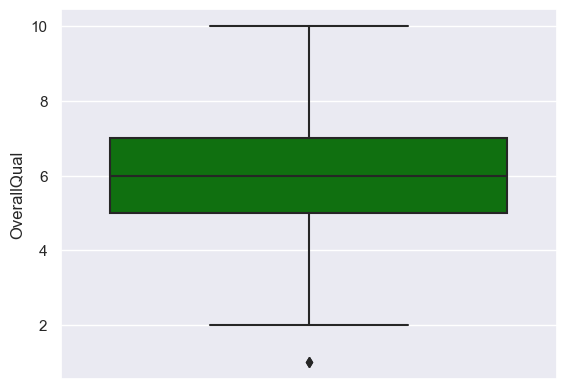

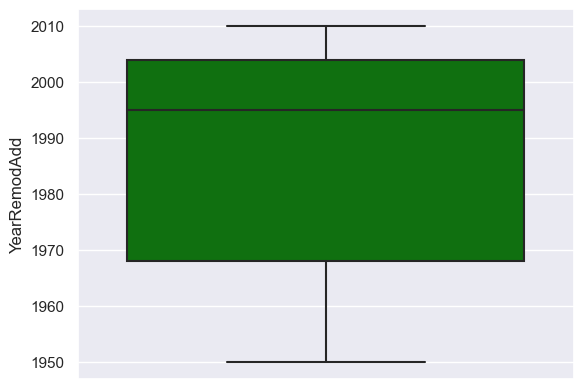

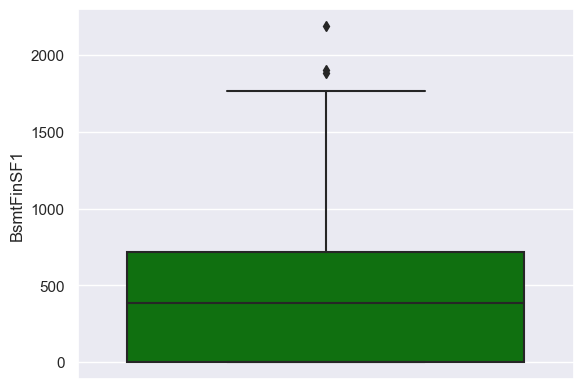

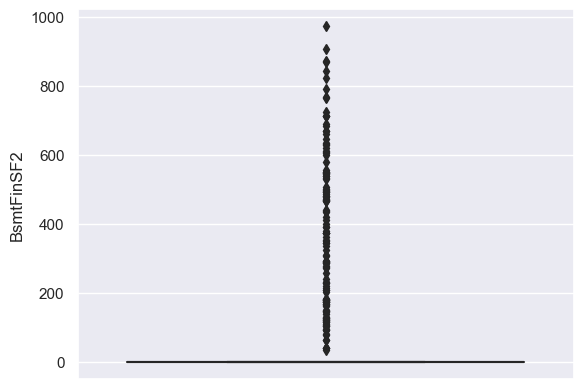

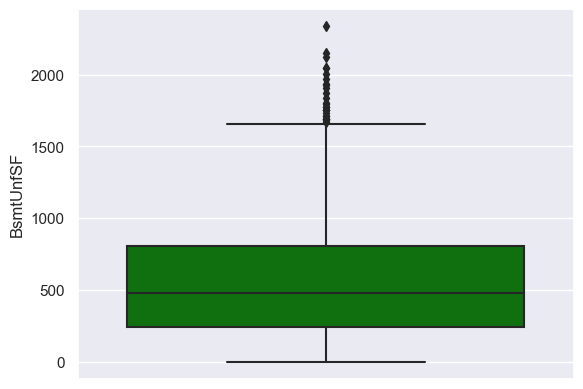

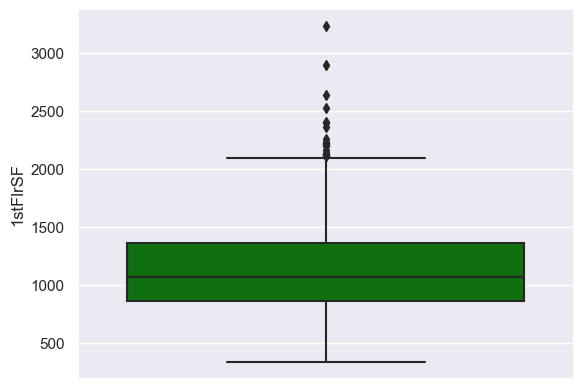

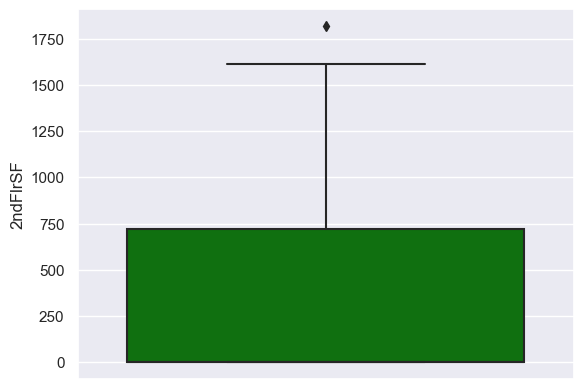

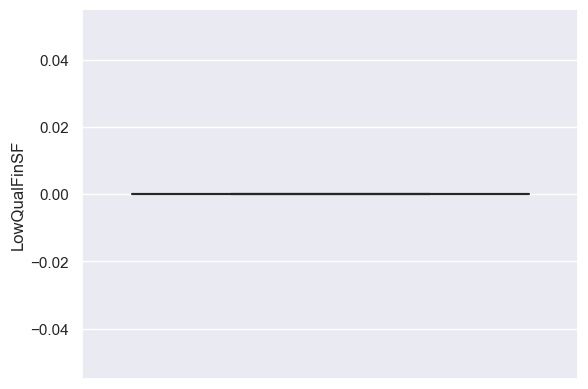

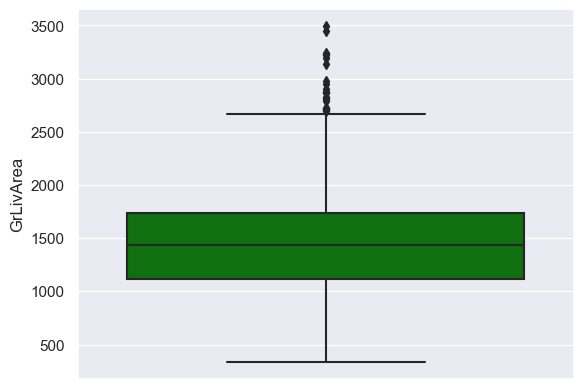

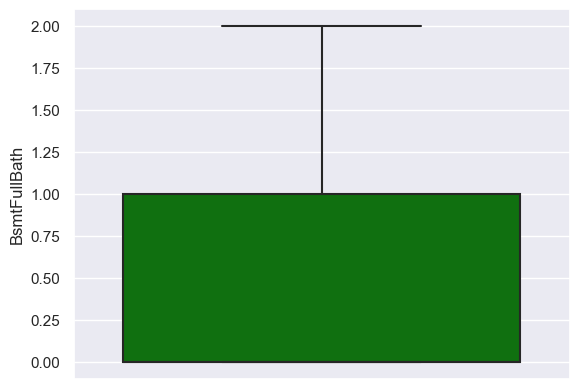

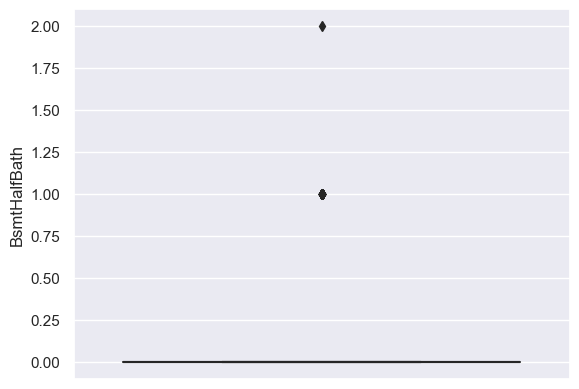

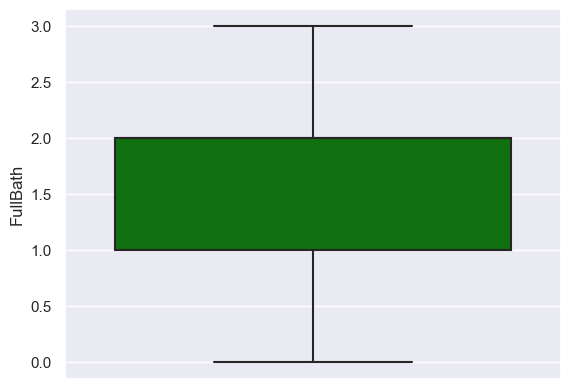

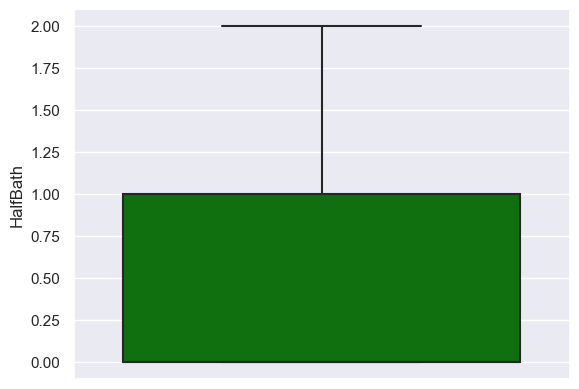

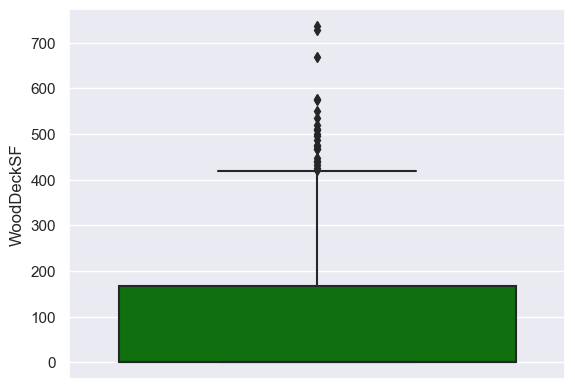

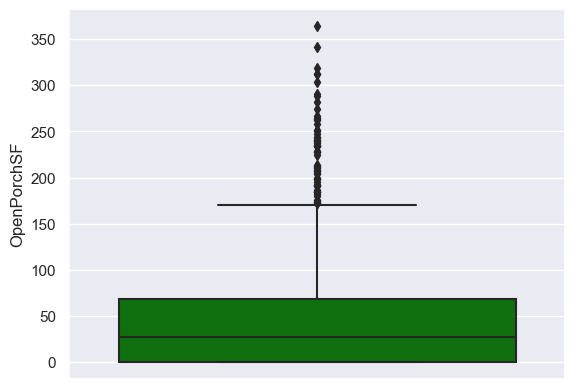

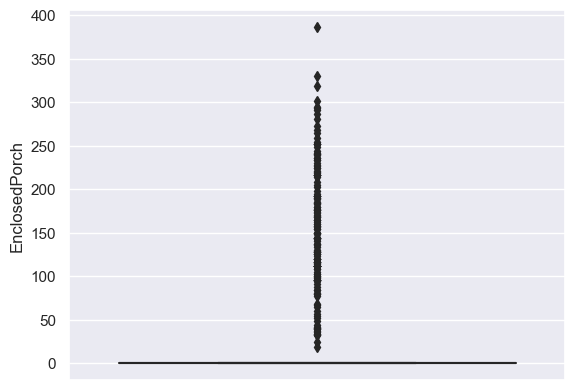

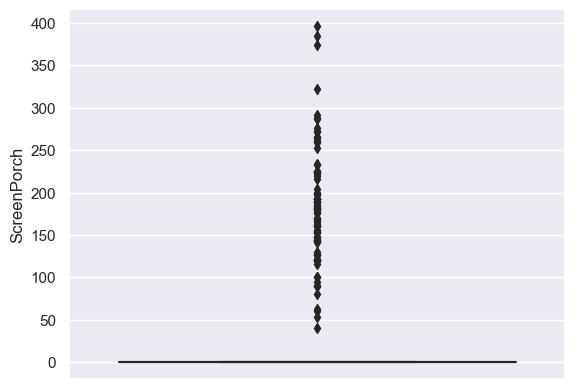

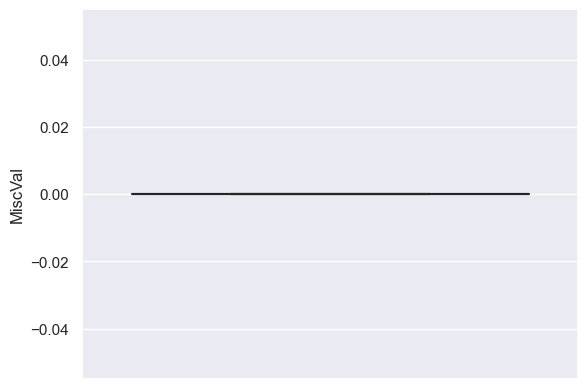

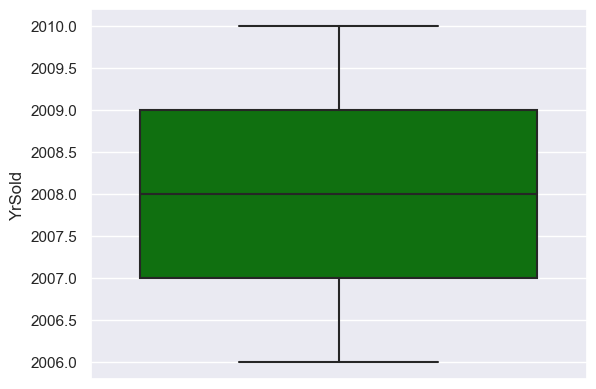

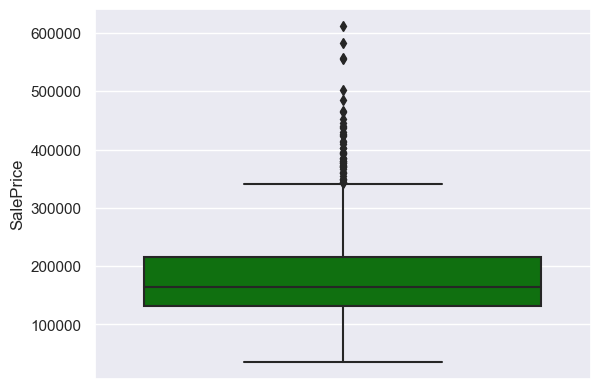

In [45]:

# Boxplot to visualize outliers
for column in num_cols:
    sns.boxplot(y=df[column],color="green")
    plt.show()


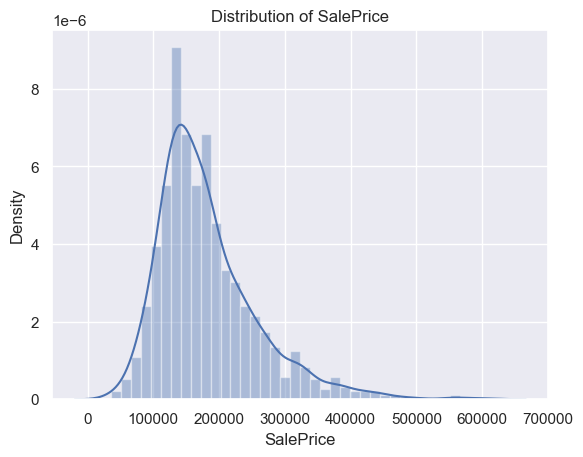

In [46]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(df['SalePrice'])
plt.show()

In [47]:
# Observation: As sales price is rightly skewed. Let's transform and recheck distribution.

In [48]:
sns.distplot(np.log(df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [49]:
# As distribution looks good after transformation. Let's store transormed sales price to dataframe.
df['SalePrice'] = np.log(df['SalePrice'])

### Derived columns

In [50]:
# PropAge -  Property Age from yearsold - yearbuilt
df['PropAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF Heating HeatingQC CentralAir Electrical  \
0          Unf           0        150    GasA        Ex          Y      SBrkr   
1          Unf           0        284    GasA        Ex          Y      SBrkr   
2          Unf           0        434    GasA        Ex          Y      SBrkr   
3          Unf           0        540    GasA        Gd          Y      SBrkr   
4          Unf           0        490    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual Functional  \
0         2         1             3             1          Gd        Typ   
1         2         0             3             1          TA        Typ   
2         2         1             3             1          Gd        Typ   
3         1         0             3             1          Gd        Typ   
4         2         1             4             1          Gd        Typ   

   Fireplaces FireplaceQu GarageType GarageFinish  GarageArea GarageQual  \
0           0        None     Attchd          RFn         548         TA   
1           1          TA     Attchd          RFn         460         TA   
2           1          TA     Attchd          R

In [51]:
# PropAge vs SalePrice
sns.scatterplot(x = df['PropAge'], y = df['SalePrice'])
plt.show()

In [52]:
# Observation: Increase in property age shows decrease in sale price

In [53]:
# Now we can drop the column Month sold and Year Sold, Year built and Year remodelled since it will not be required further

df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond RoofStyle RoofMatl Exterior1st  \
0     2Story            7            5     Gable  CompShg     VinylSd   
1     1Story            6            8     Gable  CompShg     MetalSd   
2     2Story            7            5     Gable  CompShg     VinylSd   
3     2Story            7            5     Gable  CompShg     Wd Sdng   
4     2Story            8            5     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ         706          Unf           0   
1       TA           Gd          ALQ         978          Unf           0   
2       TA           Mn          GLQ         486          Unf           0   
3       Gd           No          ALQ         216          Unf           0   
4       TA           Av          GLQ         655          Unf           0   

   BsmtUnfSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        150    GasA        Ex          Y      SBrkr       856       854   
1        284    GasA        Ex          Y      SBrkr      1262         0   
2        434    GasA        Ex          Y      SBrkr       920       866   
3        540    GasA        Gd          Y      SBrkr       961       756   
4        490    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu  \
0             3             1          Gd        Typ           0        None   
1             3             1          TA        Typ           1          TA   
2             3             1          Gd        Typ           1          TA   
3             3             1          Gd        Typ           1          Gd   
4             4             1          Gd        Typ           1          TA   

  GarageType GarageFinish  GarageArea GarageQual GarageCond PavedDrive  \
0     Attchd          RFn         548         TA         TA          Y   
1     Attchd          RFn         460         TA         TA          Y   
2     Attchd          RFn         608         TA         TA

In [54]:
# Let's check data variance
df.Street.value_counts()

Street
Pave    1262
Grvl       3
Name: count, dtype: int64

In [55]:
df.Utilities.value_counts()

Utilities
AllPub    1264
NoSeWa       1
Name: count, dtype: int64

In [56]:
# Since there is very low variance in Street and Utilities columns, let's drop both of them.
df = df.drop(['Street'], axis = 1)
df = df.drop(['Utilities'], axis = 1)

In [57]:
df.shape

(1265, 67)

### Data Preparation

In [58]:
d_types = df.dtypes
d_types

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
Heating           object
HeatingQC         object
CentralAir        object
Electrical        object
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64


In [59]:
# Bifurcating columns list into numeric and categorical
numeric_types = d_types[(d_types == 'int64') | (d_types == float)] 
categorical_types = d_types[d_types == object]

In [60]:
# converting into list
numerical_columns = list(numeric_types.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'PropAge']


In [61]:
categorical_columns = list(categorical_types.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


### Dummy Variable Creation

In [62]:
# creating dummy variables for categorical columns
df_dummy = pd.get_dummies(df[categorical_columns], drop_first=True )
df_dummy.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0        False        False         True        False         False   
1        False        False         True        False         False   
2        False        False         True        False         False   
3        False        False         True        False         False   
4        False        False         True        False         False   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0         False          True            False            False   
1         False          True            False            False   
2         False         False            False            False   
3         False         False            False            False   
4         False         False            False            False   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0             True              False          False          False   
1             True              False           True          False   
2             True              False          False          False   
3             True              False          False          False   
4             True              False           True          False   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0              True          False          False                 False   
1             False          False          False                 False   
2              True          False          False                 False   
3             False          False          False                 False   
4             False          False          False                 False   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                False                 False                 False   
1                False                 False                 False   
2                False                 False                 False   
3                False                 False                 False   
4                False                 False                 False   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                  True                 False                 False   
1                 False                 False                 False   
2                  True                 False                 False   
3                 False                  True                 False   
4                 False                 False                 False   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                 False                False                 False   
1                 False                False                 False   
2                 False                False                 False   
3                 False                False                 False   
4                 False                False                 False   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                 False               False                 False   
1                 False               False                 False   
2                 False               False                 False   
3                 False               False                 False   
4                 False               False                 False   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                False                 False                 False   
1                False                 False                 False   
2                False                 False                 False   
3                False                 False                 False   
4                False                  True                 False   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                 False               False                False   
1                 False               False           

In [63]:
df_dummy.shape

(1265, 198)

In [64]:
# concatenate dummy columns with original df
df=pd.concat([df,df_dummy], axis=1)
df.shape

(1265, 265)

In [65]:
# Drop original columns of categorical variables
df.drop(categorical_columns, axis=1, inplace=True)
df.shape

(1265, 228)

### Test-Train data split

In [66]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

df_train, df_test=train_test_split(df, train_size=0.7, test_size=0.3, random_state=50)

### Data Scaling

In [67]:
# Data Scaling
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler=MinMaxScaler()

In [69]:
df_train[numerical_columns]=scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns]=scaler.transform(df_test[numerical_columns])

In [70]:
df_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
513     0.000000     0.310559  0.224062     0.555556        0.500    0.000000   
477     0.235294     0.521739  0.352074     0.888889        0.500    0.683791   
952     0.382353     0.242236  0.167614     0.444444        0.875    0.000000   
1012    0.294118     0.211180  0.263977     0.555556        0.750    0.000000   
1390    0.000000     0.304348  0.221591     0.666667        0.500    0.216120   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
513     0.176471         0.0   0.320205  0.230108  0.000000           0.0   
477     0.000000         0.0   0.921661  0.584588  0.356300           0.0   
952     0.346639         0.0   0.046233  0.118280  0.000000           0.0   
1012    0.000000         0.0   0.257705  0.165591  0.373681           0.0   
1390    0.735294         0.0   0.053510  0.389606  0.000000           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
513    0.213360           0.0           0.0  0.333333       0.5      0.500000   
477    0.732802           0.0           0.0  0.666667       0.5      0.500000   
952    0.109671           0.0           0.5  0.333333       0.0      0.333333   
1012   0.353606           0.0           0.0  0.333333       0.5      0.500000   
1390   0.361250           0.5           0.0  0.666667       0.0      0.500000   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
513            0.0    0.000000    0.348201    0.163043     0.000000   
477            0.0    0.333333    0.499281    0.562500     0.230769   
952            0.0    0.000000    0.284892    0.260870     0.000000   
1012           0.0    0.666667    0.129496    0.130435     0.000000   
1390           0.0    0.000000    0.389209    0.297554     0.098901   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
513        0.409326        0.0     0.000000       0.0      0.0   0.462068   
477        0.000000        0.0     0.000000       0.0      0.0   0.843439   
952        0.000000        0.0     0.000000       0.0      0.0   0.461795   
1012       0.290155        0.0     0.133838       0.0      0.0   0.538210   
1390       0.000000        0.0     0.000000       0.0      0.0   0.667601   

       PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
513   0.177778        False        False         True        False   
477   0.007407        False        False         True        False   
952   0.274074        False        False         True        False   
1012  0.622222        False        False         True        False   
1390  0.044444        False        False         True        False   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
513          False         False          True            False   
477          False         False          True            False   
952          False         False          True            False   
1012         False         False          True            False   
1390         False         False          True            False   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
513             False            False              False          False   
477             False             True              False          False   
952             False             True              False          False   
1012            False             True              False          False   
1390            False             True              False          False   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
513           False             False          False          False   
477           False              True          False          False   
952           False              True          False          False   
1012          False              True          False          False   
1390          False              True      

In [71]:
df_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
152     0.235294     0.366460  0.383608     0.555556        0.500    0.223206   
31      0.000000     0.310559  0.205795     0.444444        0.625    0.000000   
27      0.000000     0.478261  0.289148     0.777778        0.500    0.177148   
1421    0.588235     0.198758  0.077926     0.555556        0.500    0.000000   
898     0.000000     0.490683  0.330085     0.888889        0.500    0.673162   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
152     0.218487         0.0   0.175086  0.236201  0.556176           0.0   
31      0.000000         0.0   0.525685  0.283154  0.000000           0.0   
27      0.639706         0.0   0.208048  0.453763  0.000000           0.0   
1421    0.189076         0.0   0.303510  0.226165  0.000000           0.0   
898     1.149160         0.0   0.060788  0.690323  0.000000           0.0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
152    0.516783           0.0           0.0  0.666667       0.5      0.666667   
31     0.262546           0.0           0.0  0.333333       0.5      0.500000   
27     0.420738           0.5           0.0  0.666667       0.0      0.500000   
1421   0.209704           0.0           0.0  0.666667       0.0      0.333333   
898    0.640080           0.5           0.0  0.666667       0.5      0.333333   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
152            0.0    0.333333    0.356115         0.0     0.181319   
31             0.0    0.000000    0.194964         0.0     0.178571   
27             0.0    0.333333    0.555396         0.0     0.137363   
1421           0.0    0.333333    0.316547         0.0     0.151099   
898            0.0    0.666667    0.589928         0.0     0.184066   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
152             0.0        0.0     0.000000       0.0      0.0   0.589829   
31              0.0        0.0     0.000000       0.0      0.0   0.501749   
27              0.0        0.0     0.000000       0.0      0.0   0.764194   
1421            0.0        0.0     0.416667       0.0      0.0   0.443875   
898             0.0        0.0     0.000000       0.0      0.0   1.017599   

       PropAge  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
152   0.259259        False        False         True        False   
31    0.311111        False        False         True        False   
27    0.022222        False        False         True        False   
1421  0.244444        False        False         True        False   
898   0.007407        False        False         True        False   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
152          False         False         False            False   
31           False         False         False            False   
27           False         False          True            False   
1421         False         False          True            False   
898          False         False         False            False   

      LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  \
152             False             True               True          False   
31              False             True               True          False   
27              False             True              False          False   
1421            False             True              False          False   
898             False             True              False          False   

      LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  \
152           False             False          False          False   
31            False             False          False          False   
27            False              True          False          False   
1421          False              True          False          False   
898           False              True      

#### X and Y dataset

In [72]:
# Divide train and test data set into X and y data set
y_train=df_train.pop('SalePrice')
X_train=df_train

In [73]:
print('y_train shape', y_train.shape)
print('X_train shape', X_train.shape)

y_train shape (885,)
X_train shape (885, 227)


In [74]:
y_test=df_test.pop('SalePrice')
X_test=df_test

In [75]:
print('y_test shape', y_test.shape)
print('X_test shape', X_test.shape)

y_test shape (380,)
X_test shape (380, 227)


### Model Building 

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [77]:
# Training model on Linear Regression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [78]:
y_train_pred=lr.predict(X_train)

In [79]:
# Model evaulation on train set
r2_score(y_train,y_train_pred)

0.9583948141762659

In [80]:
mean_squared_error(y_train,y_train_pred)

0.0008343229460237873

In [81]:
plt.scatter(y_train,y_train_pred)
plt.show()

#### Model evaluation test data set

In [82]:
y_test_pred=lr.predict(X_test)

In [83]:
r2_score(y_test,y_test_pred)

-1.2769659417300845e+19

In [84]:
mean_squared_error(y_test,y_test_pred)

2.7926405654790307e+17

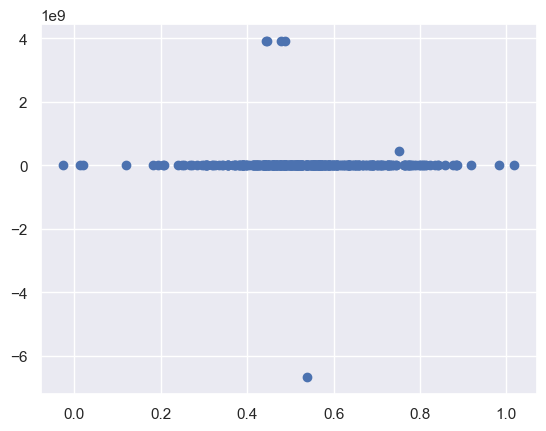

In [85]:
plt.scatter(y_test,y_test_pred)
plt.show()

In [86]:
# Observation : As the R2 score is very less as compared to train R2 score. which means model is overfitted.
# Let's try another methods to make it fix.

## Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

In [88]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 3.0}
-0.02912457697294531


In [90]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.014924      0.003419         0.006983        0.002391      0.0001   
1       0.011955      0.003167         0.007431        0.002527       0.001   
2       0.010646      0.001338         0.004859        0.002007        0.01   
3       0.012966      0.002307         0.005464        0.002797        0.05   
4       0.010800      0.001203         0.005470        0.003267         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.030248          -0.029859          -0.037408   
1   {'alpha': 0.001}          -0.030225          -0.029842          -0.037372   
2    {'alpha': 0.01}          -0.030041          -0.029846          -0.037028   
3    {'alpha': 0.05}          -0.029551          -0.029407          -0.035858   
4     {'alpha': 0.1}          -0.029146          -0.029050          -0.034809   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.035583          -0.032372        -0.033094        0.002963   
1          -0.035563          -0.032356        -0.033072        0.002958   
2          -0.035393          -0.032214        -0.032905        0.002871   
3          -0.034875          -0.031938        -0.032326        0.002659   
4          -0.034433          -0.031708        -0.031829        0.002474   

   rank_test_score  split0_train_score  split1_train_score  \
0               23           -0.020165           -0.019969   
1               22           -0.020170           -0.019977   
2               21           -0.020211           -0.020028   
3               20           -0.020330           -0.020170   
4               19           -0.020447           -0.020292   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.019031           -0.020003           -0.020032   
1           -0.019035           -0.020005           -0.020035   
2           -0.019075           -0.020031           -0.020065   
3           -0.019232           -0.020117           -0.020178   
4           -0.019421           -0.020199           -0.020278   

   mean_train_score  std_train_score  
0         -0.019840         0.000410  
1         -0.019844         0.000410  
2         -0.019882         0.000409  
3         -0.020005         0.000393  
4         -0.020127         0.000362

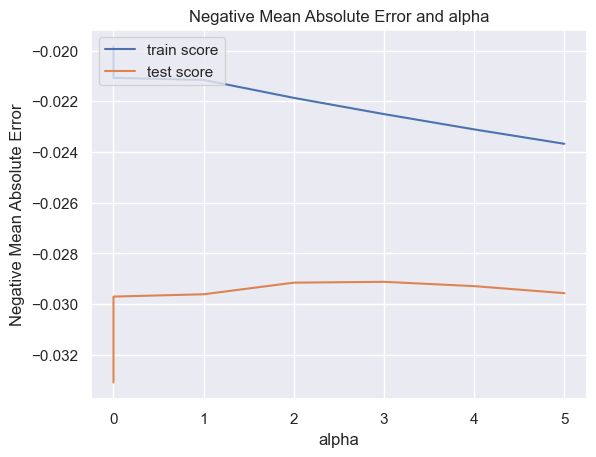

In [91]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [92]:
# Observation: Optimum value of alpha for Ridge is 3. Let's check coefficient for this value.

alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-1.26705953e-02,  1.63883095e-02,  5.18258823e-02,  1.11021884e-01,
        8.01013750e-02,  1.10534782e-02,  7.37551843e-02,  1.76306102e-02,
        4.86364841e-02,  9.77823490e-02,  5.30635879e-02,  0.00000000e+00,
        1.19075505e-01,  1.83452480e-02,  4.24120182e-03,  5.56741421e-02,
        2.53246730e-02,  2.54664864e-02,  0.00000000e+00,  1.21168173e-02,
        5.81161855e-02,  1.99953844e-02,  1.70017926e-02,  1.17094055e-02,
        0.00000000e+00,  3.90973312e-02,  0.00000000e+00,  0.00000000e+00,
       -5.15335487e-02,  1.39488258e-02,  6.18596297e-03,  1.96635930e-02,
        2.08538992e-03, -1.76860129e-03,  1.24591229e-02,  1.03359970e-03,
        1.21237909e-02,  2.13322661e-03,  1.00529667e-02,  6.97464998e-03,
       -1.64477214e-02, -3.98595617e-03, -6.05560104e-03, -4.02454833e-03,
       -2.22769100e-02, -4.56556077e-03, -1.11440789e-02,  9.22880282e-03,
        4.69041669e-04, -9.49996224e-03,  5.16685820e-02, -2.41680083e-02,
       -1.05916829e-02, -

In [93]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(X_train, 4) for X_train in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.1603),
 ('MSSubClass', -0.0127),
 ('LotFrontage', 0.0164),
 ('LotArea', 0.0518),
 ('OverallQual', 0.111),
 ('OverallCond', 0.0801),
 ('MasVnrArea', 0.0111),
 ('BsmtFinSF1', 0.0738),
 ('BsmtFinSF2', 0.0176),
 ('BsmtUnfSF', 0.0486),
 ('1stFlrSF', 0.0978),
 ('2ndFlrSF', 0.0531),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.1191),
 ('BsmtFullBath', 0.0183),
 ('BsmtHalfBath', 0.0042),
 ('FullBath', 0.0557),
 ('HalfBath', 0.0253),
 ('BedroomAbvGr', 0.0255),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', 0.0121),
 ('GarageArea', 0.0581),
 ('WoodDeckSF', 0.02),
 ('OpenPorchSF', 0.017),
 ('EnclosedPorch', 0.0117),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0391),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('PropAge', -0.0515),
 ('MSZoning_FV', 0.0139),
 ('MSZoning_RH', 0.0062),
 ('MSZoning_RL', 0.0197),
 ('MSZoning_RM', 0.0021),
 ('LotShape_IR2', -0.0018),
 ('LotShape_IR3', 0.0125),
 ('LotShape_Reg', 0.001),
 ('LandContour_HLS', 0.0121),
 ('LandContour_Low', 0.0021),
 ('LandContour_Lvl', 0.0101)

### Ridge Model Evaluation

In [94]:
# Ridge Regression -- prediction
y_train_pred_ridge = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.9508891166892103
0.8960130304407138


In [95]:
# Creating a dataframe for the coefficients obtained from Ridge
mod_param = list(zip(cols, model_parameters))
param = pd.DataFrame(mod_param)
param.columns = ['Variable', 'Coeff']

# sort the coefficients in ascending order
param = param.sort_values((['Coeff']), axis = 0, ascending = False)

# Chose variables whose coefficients are non-zero
final_params_ridge = pd.DataFrame(param[(param['Coeff'] != 0)])
final_params_ridge

Variable   Coeff
0                 constant  0.1603
13               GrLivArea  0.1191
4              OverallQual  0.1110
10                1stFlrSF  0.0978
5              OverallCond  0.0801
7               BsmtFinSF1  0.0738
21              GarageArea  0.0581
16                FullBath  0.0557
11                2ndFlrSF  0.0531
3                  LotArea  0.0518
51    Neighborhood_Crawfor  0.0517
9                BsmtUnfSF  0.0486
67    Neighborhood_StoneBr  0.0479
26             ScreenPorch  0.0391
167           Heating_GasW  0.0310
188         Functional_Typ  0.0273
226   SaleCondition_Normal  0.0264
18            BedroomAbvGr  0.0255
17                HalfBath  0.0253
61    Neighborhood_NridgHt  0.0238
101    Exterior1st_BrkFace  0.0238
220           SaleType_New  0.0222
71         Condition1_Norm  0.0219
138       Foundation_PConc  0.0213
146            BsmtCond_Gd  0.0209
96          RoofStyle_Shed  0.0201
22              WoodDeckSF  0.0200
66    Neighborhood_Somerst  0.0197
32             MSZoning_RL  0.0197
149            BsmtCond_TA  0.0192
14            BsmtFullBath  0.0183
8               BsmtFinSF2  0.0176
139        Foundation_Slab  0.0171
23             OpenPorchSF  0.0170
60    Neighborhood_NoRidge  0.0169
2              LotFrontage  0.0164
166           Heating_GasA  0.0158
215           SaleType_CWD  0.0157
140       Foundation_Stone  0.0156
130       MasVnrType_Stone  0.0154
216           SaleType_Con  0.0154
194      GarageType_Attchd  0.0146
227  SaleCondition_Partial  0.0145
30             MSZoning_FV  0.0139
150        BsmtExposure_Gd  0.0137
77         Condition1_RRNn  0.0130
196     GarageType_BuiltIn  0.0129
58    Neighborhood_NPkVill  0.0127
35            LotShape_IR3  0.0125
185        Functional_Min2  0.0124
37         LandContour_HLS  0.0121
20              Fireplaces  0.0121
207          GarageQual_TA  0.0117
24           EnclosedPorch  0.0117
198      GarageType_Detchd  0.0117
126    Exterior2nd_Wd Sdng  0.0116
218         SaleType_ConLI  0.0116
184        Functional_Min1  0.0113
170           Heating_Wall  0.0111
6               MasVnrArea  0.0111
128     MasVnrType_BrkFace  0.0110
125    Exterior2nd_VinylSd  0.0109
223  SaleCondition_AdjLand  0.0109
98        RoofMatl_WdShake  0.0104
211          GarageCond_Po  0.0103
109     Exterior1st_Stucco  0.0101
39         LandContour_Lvl  0.0101
69    Neighborhood_Veenker  0.0098
93       RoofStyle_Gambrel  0.0097
95       RoofStyle_Mansard  0.0093
48    Neighborhood_BrkSide  0.0092
161       BsmtFinType2_GLQ  0.0091
75         Condition1_RRAn  0.0083
85       HouseStyle_1.5Unf  0.0080
112    Exterior1st_WdShing  0.0079
70        Condition1_Feedr  0.0078
123      Exterior2nd_Stone  0.0077
40       LotConfig_CulDSac  0.0070
175           CentralAir_Y  0.0069
90       HouseStyle_SFoyer  0.0068
31             MSZoning_RH  0.0062
73         Condition1_PosN  0.0062
129        MasVnrType_None  0.0061
137      Foundation_CBlock  0.0056
86       HouseStyle_1Story  0.0055
88       HouseStyle_2.5Unf  0.0051
72         Condition1_PosA  0.0048
209          GarageCond_Gd  0.0046
204          GarageQual_Gd  0.0045
91         HouseStyle_SLvl  0.0042
15            BsmtHalfBath  0.0042
155       BsmtFinType1_GLQ  0.0035
119    Exterior2nd_ImStucc  0.0035
192         FireplaceQu_Po  0.0034
106    Exterior1st_MetalSd  0.0031
217         SaleType_ConLD  0.0025
33             MSZoning_RM  0.0021
120    Exterior2nd_MetalSd  0.0021
38         LandContour_Low  0.0021
89       HouseStyle_2Story  0.0019
76         Condition1_RRNe  0.0019
219         SaleType_ConLw  0.0017
148            BsmtCond_Po  0.0015
103    Exterior1st_CemntBd  0.0014
141        Foundation_Wood  0.0013
118    Exterior2nd_HdBoard  0.0013
115    Exterior2nd_BrkFace  0.0012
214           PavedDrive_Y  0.0011
36            LotShape_Reg  0.0010
221           SaleType_Oth  0.0006
49    Neighborhood_ClearCr  0.0005
190         FireplaceQu_Gd -0.0001
201       GarageFinish_RFn -0.0001
162       BsmtFinType2_LwQ -

In [96]:
final_params_ridge.shape

(219, 2)

In [97]:
Ridge_var = list(final_params_ridge['Variable'])
print(Ridge_var)

['constant', 'GrLivArea', 'OverallQual', '1stFlrSF', 'OverallCond', 'BsmtFinSF1', 'GarageArea', 'FullBath', '2ndFlrSF', 'LotArea', 'Neighborhood_Crawfor', 'BsmtUnfSF', 'Neighborhood_StoneBr', 'ScreenPorch', 'Heating_GasW', 'Functional_Typ', 'SaleCondition_Normal', 'BedroomAbvGr', 'HalfBath', 'Neighborhood_NridgHt', 'Exterior1st_BrkFace', 'SaleType_New', 'Condition1_Norm', 'Foundation_PConc', 'BsmtCond_Gd', 'RoofStyle_Shed', 'WoodDeckSF', 'Neighborhood_Somerst', 'MSZoning_RL', 'BsmtCond_TA', 'BsmtFullBath', 'BsmtFinSF2', 'Foundation_Slab', 'OpenPorchSF', 'Neighborhood_NoRidge', 'LotFrontage', 'Heating_GasA', 'SaleType_CWD', 'Foundation_Stone', 'MasVnrType_Stone', 'SaleType_Con', 'GarageType_Attchd', 'SaleCondition_Partial', 'MSZoning_FV', 'BsmtExposure_Gd', 'Condition1_RRNn', 'GarageType_BuiltIn', 'Neighborhood_NPkVill', 'LotShape_IR3', 'Functional_Min2', 'LandContour_HLS', 'Fireplaces', 'GarageQual_TA', 'EnclosedPorch', 'GarageType_Detchd', 'Exterior2nd_Wd Sdng', 'SaleType_ConLI', 'Fun

In [98]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge)))

RMSE : 0.04768780412362919


In [99]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_pred_ridge)
fig.suptitle('y_test vs y_test_pred_ridge', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred_ridge', fontsize=16)  
plt.show()

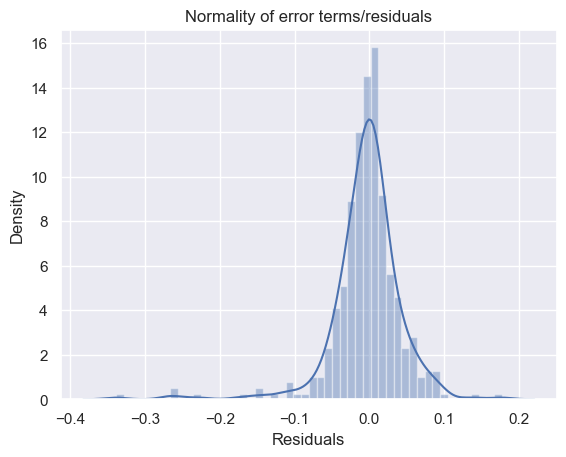

In [100]:
y_res=y_test-y_test_pred_ridge
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [101]:
# Observation: Test and Train R2 is looking good with optimum value and Ridge regression has solved the above problem.
# Let's analyse further with another method.

## Lasso Regression 

In [102]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [103]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.028300170260398466


In [104]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.024597      0.006347         0.005379        0.003075      0.0001   
1       0.017525      0.001982         0.004266        0.002392       0.001   
2       0.015682      0.003087         0.004007        0.002582        0.01   
3       0.012856      0.003054         0.004124        0.004290        0.05   
4       0.014682      0.001502         0.004816        0.001923         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.025687          -0.026623          -0.029368   
1   {'alpha': 0.001}          -0.030798          -0.032878          -0.034083   
2    {'alpha': 0.01}          -0.069032          -0.066153          -0.073538   
3    {'alpha': 0.05}          -0.110429          -0.113383          -0.120471   
4     {'alpha': 0.1}          -0.110429          -0.113383          -0.120471   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.030022          -0.029801        -0.028300        0.001789   
1          -0.032118          -0.037593        -0.033494        0.002310   
2          -0.066483          -0.064320        -0.067905        0.003192   
3          -0.105461          -0.109927        -0.111934        0.004963   
4          -0.105461          -0.109927        -0.111934        0.004963   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.022798           -0.022289   
1                2           -0.031527           -0.031399   
2                3           -0.067141           -0.066627   
3                4           -0.112139           -0.111373   
4                4           -0.112139           -0.111373   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.022150           -0.022297           -0.021984   
1           -0.030973           -0.030948           -0.030133   
2           -0.067067           -0.066574           -0.066988   
3           -0.109651           -0.113343           -0.112413   
4           -0.109651           -0.113343           -0.112413   

   mean_train_score  std_train_score  
0         -0.022304         0.000272  
1         -0.030996         0.000488  
2         -0.066879         0.000233  
3         -0.111784         0.001238  
4         -0.111784         0.001238

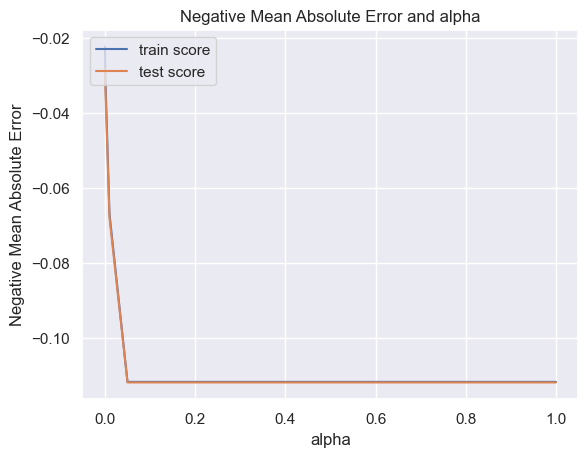

In [105]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [106]:
# Observation: 0.0001 alpha value is optimum. Let's see how the score is with 0.0001

In [107]:
# At alpha = 0.0001

alpha = 0.0001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-6.39366632e-03,  8.49328905e-03,  6.46627466e-02,  1.56331503e-01,
        1.08017120e-01,  0.00000000e+00,  8.09700847e-02,  2.09128631e-02,
        4.41345112e-02,  2.50173201e-02,  0.00000000e+00,  0.00000000e+00,
        2.70731066e-01,  1.90123781e-02,  0.00000000e+00,  3.80008612e-02,
        1.83084478e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.90037093e-02,  1.62461910e-02,  8.99975842e-03,  9.79809808e-03,
        0.00000000e+00,  4.19359019e-02,  0.00000000e+00,  0.00000000e+00,
       -9.04878938e-02,  3.79924338e-03,  0.00000000e+00,  1.28191870e-02,
       -3.71170638e-03, -0.00000000e+00,  1.04734298e-03,  7.32194334e-04,
        7.19419885e-03,  0.00000000e+00,  1.01888753e-02,  4.82977125e-03,
       -5.75396233e-03, -0.00000000e+00, -4.84092989e-03, -0.00000000e+00,
       -4.57334131e-03, -0.00000000e+00, -0.00000000e+00,  1.53776104e-02,
        0.00000000e+00, -1.51598642e-03,  5.65295476e-02, -1.48128797e-02,
       -0.00000000e+00,  

In [108]:
# Observation: Lasso regression has made many of the features coefficient to 0 which makes model equation very simpler as 
# compared to Ridge regression

In [109]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(X_train, 4) for X_train in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.1251),
 ('MSSubClass', -0.0064),
 ('LotFrontage', 0.0085),
 ('LotArea', 0.0647),
 ('OverallQual', 0.1563),
 ('OverallCond', 0.108),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.081),
 ('BsmtFinSF2', 0.0209),
 ('BsmtUnfSF', 0.0441),
 ('1stFlrSF', 0.025),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.2707),
 ('BsmtFullBath', 0.019),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.038),
 ('HalfBath', 0.0183),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.059),
 ('WoodDeckSF', 0.0162),
 ('OpenPorchSF', 0.009),
 ('EnclosedPorch', 0.0098),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0419),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('PropAge', -0.0905),
 ('MSZoning_FV', 0.0038),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0128),
 ('MSZoning_RM', -0.0037),
 ('LotShape_IR2', -0.0),
 ('LotShape_IR3', 0.001),
 ('LotShape_Reg', 0.0007),
 ('LandContour_HLS', 0.0072),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', 0.0102),
 ('LotConfig_CulDSac', 0

#### Lasso Model Evaluation

In [110]:
# Lasso Regression -- Prediction
y_train_pred_lasso = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.9495217076269457
0.9050552834284176


In [111]:
# Observation: The R2 score for train and test data is looking good on using alpha value 0.0001 for Lasso regression.
# Test score in Lasso regression is better and more closer to Train score as compared to Ridge regression

In [112]:
# Creating a dataframe for the coefficients obtained from Lasso
mod_param = list(zip(cols, model_parameters))
param = pd.DataFrame(mod_param)
param.columns = ['Variable', 'Coeff']

# sort the coefficients in ascending order
param = param.sort_values((['Coeff']), axis = 0, ascending = False)

# Chose variables whose coefficients are non-zero
final_params_lasso = pd.DataFrame(param[(param['Coeff'] != 0)])
final_params_lasso

Variable   Coeff
13               GrLivArea  0.2707
4              OverallQual  0.1563
0                 constant  0.1251
5              OverallCond  0.1080
7               BsmtFinSF1  0.0810
3                  LotArea  0.0647
21              GarageArea  0.0590
51    Neighborhood_Crawfor  0.0565
67    Neighborhood_StoneBr  0.0487
9                BsmtUnfSF  0.0441
26             ScreenPorch  0.0419
16                FullBath  0.0380
220           SaleType_New  0.0355
66    Neighborhood_Somerst  0.0304
61    Neighborhood_NridgHt  0.0266
226   SaleCondition_Normal  0.0262
10                1stFlrSF  0.0250
188         Functional_Typ  0.0249
101    Exterior1st_BrkFace  0.0220
8               BsmtFinSF2  0.0209
14            BsmtFullBath  0.0190
17                HalfBath  0.0183
71         Condition1_Norm  0.0178
149            BsmtCond_TA  0.0163
22              WoodDeckSF  0.0162
60    Neighborhood_NoRidge  0.0162
138       Foundation_PConc  0.0154
48    Neighborhood_BrkSide  0.0154
146            BsmtCond_Gd  0.0152
167           Heating_GasW  0.0146
32             MSZoning_RL  0.0128
194      GarageType_Attchd  0.0127
196     GarageType_BuiltIn  0.0123
150        BsmtExposure_Gd  0.0123
207          GarageQual_TA  0.0116
39         LandContour_Lvl  0.0102
198      GarageType_Detchd  0.0098
24           EnclosedPorch  0.0098
106    Exterior1st_MetalSd  0.0092
23             OpenPorchSF  0.0090
2              LotFrontage  0.0085
140       Foundation_Stone  0.0075
126    Exterior2nd_Wd Sdng  0.0075
125    Exterior2nd_VinylSd  0.0072
37         LandContour_HLS  0.0072
130       MasVnrType_Stone  0.0065
185        Functional_Min2  0.0062
86       HouseStyle_1Story  0.0050
40       LotConfig_CulDSac  0.0048
93       RoofStyle_Gambrel  0.0040
30             MSZoning_FV  0.0038
90       HouseStyle_SFoyer  0.0038
128     MasVnrType_BrkFace  0.0035
64     Neighborhood_Sawyer  0.0033
69    Neighborhood_Veenker  0.0032
175           CentralAir_Y  0.0031
227  SaleCondition_Partial  0.0030
192         FireplaceQu_Po  0.0026
155       BsmtFinType1_GLQ  0.0023
215           SaleType_CWD  0.0015
91         HouseStyle_SLvl  0.0013
75         Condition1_RRAn  0.0011
35            LotShape_IR3  0.0010
36            LotShape_Reg  0.0007
112    Exterior1st_WdShing  0.0007
70        Condition1_Feedr  0.0007
211          GarageCond_Po  0.0006
137      Foundation_CBlock  0.0005
201       GarageFinish_RFn  0.0004
63      Neighborhood_SWISU -0.0002
164       BsmtFinType2_Rec -0.0004
62    Neighborhood_OldTown -0.0006
158       BsmtFinType1_Rec -0.0007
68     Neighborhood_Timber -0.0009
179       Electrical_SBrkr -0.0013
50    Neighborhood_CollgCr -0.0015
57      Neighborhood_NAmes -0.0020
104    Exterior1st_HdBoard -0.0021
142            BsmtQual_Fa -0.0025
205        GarageQual_None -0.0026
199        GarageType_None -0.0031
127    Exterior2nd_Wd Shng -0.0034
111    Exterior1st_Wd Sdng -0.0036
33             MSZoning_RM -0.0037
133           ExterQual_TA -0.0042
152        BsmtExposure_No -0.0043
122    Exterior2nd_Plywood -0.0044
159       BsmtFinType1_Unf -0.0045
45           LandSlope_Sev -0.0046
74         Condition1_RRAe -0.0047
151        BsmtExposure_Mn -0.0048
43        LotConfig_Inside -0.0048
135           ExterCond_Gd -0.0053
208          GarageCond_Fa -0.0054
222            SaleType_WD -0.0058
41           LotConfig_FR2 -0.0058
172           HeatingQC_Gd -0.0062
1               MSSubClass -0.0064
156       BsmtFinType1_LwQ -0.0074
171           HeatingQC_Fa -0.0075
100    Exterior1st_BrkComm -0.0088
174           HeatingQC_TA -0.0093
153      BsmtExposure_None -0.0097
84         BldgType_TwnhsE -0.0102
145            BsmtQual_TA -0.0103
143            BsmtQual_Gd -0.0104
56    Neighborhood_Mitchel -0.0105
191       FireplaceQu_None -0.0114
52    Neighborhood_Edwards -0.0148
186         Functional_Mod -0.0155
181         KitchenQual_Gd -0.0156
225   SaleCondition_Family -0.0190
182         KitchenQual_TA -0.0194
83          BldgType_Twnhs -

In [113]:
final_params_lasso.shape

(120, 2)

In [114]:
Lasso_var = list(final_params_lasso['Variable'])
print(Lasso_var)

['GrLivArea', 'OverallQual', 'constant', 'OverallCond', 'BsmtFinSF1', 'LotArea', 'GarageArea', 'Neighborhood_Crawfor', 'Neighborhood_StoneBr', 'BsmtUnfSF', 'ScreenPorch', 'FullBath', 'SaleType_New', 'Neighborhood_Somerst', 'Neighborhood_NridgHt', 'SaleCondition_Normal', '1stFlrSF', 'Functional_Typ', 'Exterior1st_BrkFace', 'BsmtFinSF2', 'BsmtFullBath', 'HalfBath', 'Condition1_Norm', 'BsmtCond_TA', 'WoodDeckSF', 'Neighborhood_NoRidge', 'Foundation_PConc', 'Neighborhood_BrkSide', 'BsmtCond_Gd', 'Heating_GasW', 'MSZoning_RL', 'GarageType_Attchd', 'GarageType_BuiltIn', 'BsmtExposure_Gd', 'GarageQual_TA', 'LandContour_Lvl', 'GarageType_Detchd', 'EnclosedPorch', 'Exterior1st_MetalSd', 'OpenPorchSF', 'LotFrontage', 'Foundation_Stone', 'Exterior2nd_Wd Sdng', 'Exterior2nd_VinylSd', 'LandContour_HLS', 'MasVnrType_Stone', 'Functional_Min2', 'HouseStyle_1Story', 'LotConfig_CulDSac', 'RoofStyle_Gambrel', 'MSZoning_FV', 'HouseStyle_SFoyer', 'MasVnrType_BrkFace', 'Neighborhood_Sawyer', 'Neighborhood_V

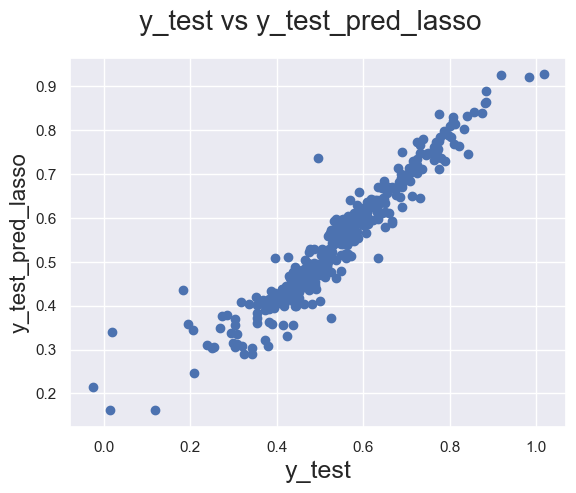

In [115]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,y_test_pred_lasso)
fig.suptitle('y_test vs y_test_pred_lasso', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred_lasso', fontsize=16)  
plt.show()

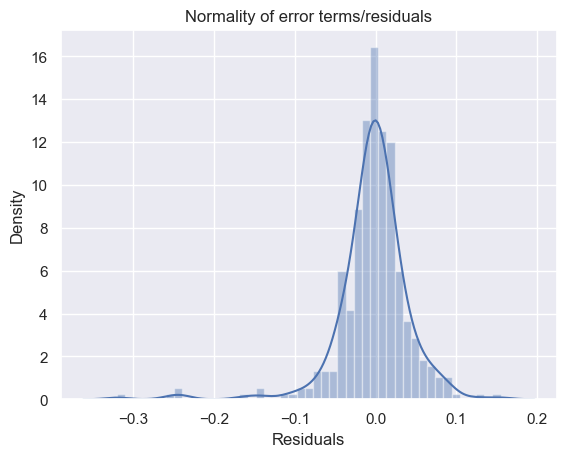

In [116]:
y_res = y_test-y_test_pred_lasso
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [117]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso)))

RMSE : 0.04556729675726664


#### Observation :

In [118]:
# Accuracy is better in lasso regression and RMSE is also better in lasso regression as compared to Ridge regression.

In [119]:
# Let's see the coefficients for both Ridge and lasso after applying regularization algorithm.

In [120]:
betas = pd.DataFrame(index=X_train.columns)

In [121]:
betas.rows = X_train.columns

In [122]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [123]:
betas

Ridge     Lasso
MSSubClass            -0.012671 -0.006394
LotFrontage            0.016388  0.008493
LotArea                0.051826  0.064663
OverallQual            0.111022  0.156332
OverallCond            0.080101  0.108017
MasVnrArea             0.011053  0.000000
BsmtFinSF1             0.073755  0.080970
BsmtFinSF2             0.017631  0.020913
BsmtUnfSF              0.048636  0.044135
1stFlrSF               0.097782  0.025017
2ndFlrSF               0.053064  0.000000
LowQualFinSF           0.000000  0.000000
GrLivArea              0.119076  0.270731
BsmtFullBath           0.018345  0.019012
BsmtHalfBath           0.004241  0.000000
FullBath               0.055674  0.038001
HalfBath               0.025325  0.018308
BedroomAbvGr           0.025466  0.000000
KitchenAbvGr           0.000000  0.000000
Fireplaces             0.012117  0.000000
GarageArea             0.058116  0.059004
WoodDeckSF             0.019995  0.016246
OpenPorchSF            0.017002  0.009000
EnclosedPorch          0.011709  0.009798
3SsnPorch              0.000000  0.000000
ScreenPorch            0.039097  0.041936
PoolArea               0.000000  0.000000
MiscVal                0.000000  0.000000
PropAge               -0.051534 -0.090488
MSZoning_FV            0.013949  0.003799
MSZoning_RH            0.006186  0.000000
MSZoning_RL            0.019664  0.012819
MSZoning_RM            0.002085 -0.003712
LotShape_IR2          -0.001769 -0.000000
LotShape_IR3           0.012459  0.001047
LotShape_Reg           0.001034  0.000732
LandContour_HLS        0.012124  0.007194
LandContour_Low        0.002133  0.000000
LandContour_Lvl        0.010053  0.010189
LotConfig_CulDSac      0.006975  0.004830
LotConfig_FR2         -0.016448 -0.005754
LotConfig_FR3         -0.003986 -0.000000
LotConfig_Inside      -0.006056 -0.004841
LandSlope_Mod         -0.004025 -0.000000
LandSlope_Sev         -0.022277 -0.004573
Neighborhood_Blueste  -0.004566 -0.000000
Neighborhood_BrDale   -0.011144 -0.000000
Neighborhood_BrkSide   0.009229  0.015378
Neighborhood_ClearCr   0.000469  0.000000
Neighborhood_CollgCr  -0.009500 -0.001516
Neighborhood_Crawfor   0.051669  0.056530
Neighborhood_Edwards  -0.024168 -0.014813
Neighborhood_Gilbert  -0.010592 -0.000000
Neighborhood_IDOTRR   -0.005828  0.000000
Neighborhood_MeadowV  -0.044385 -0.029889
Neighborhood_Mitchel  -0.015997 -0.010543
Neighborhood_NAmes    -0.010965 -0.002020
Neighborhood_NPkVill   0.012709  0.000000
Neighborhood_NWAmes   -0.002781  0.000000
Neighborhood_NoRidge   0.016937  0.016199
Neighborhood_NridgHt   0.023773  0.026634
Neighborhood_OldTown  -0.008065 -0.000643
Neighborhood_SWISU    -0.013996 -0.000168
Neighborhood_Sawyer   -0.001234  0.003309
Neighborhood_SawyerW  -0.002279  0.000000
Neighborhood_Somerst   0.019734  0.030360
Neighborhood_StoneBr   0.047927  0.048719
Neighborhood_Timber   -0.009498 -0.000921
Neighborhood_Veenker   0.009794  0.003191
Condition1_Feedr       0.007809  0.000674
Condition1_Norm        0.021928  0.017769
Condition1_PosA        0.004792 -0.000000
Condition1_PosN        0.006172  0.000000
Condition1_RRAe       -0.011968 -0.004700
Condition1_RRAn        0.008263  0.001149
Condition1_RRNe        0.001900  0.000000
Condition1_RRNn        0.012985  0.000000
Condition2_Norm       -0.002553  0.000000
Condition2_PosN       -0.006569 -0.000000
Condition2_RRNn       -0.006029 -0.000000
BldgType_2fmCon       -0.000371 -0.000000
BldgType_Duplex       -0.001314  0.000000
BldgType_Twnhs        -0.020570 -0.023563
BldgType_TwnhsE       -0.011895 -0.010171
HouseStyle_1.5Unf      0.008047  0.000000
HouseStyle_1Story      0.005515  0.004974
HouseStyle_2.5Fin      0.000000  0.000000
HouseStyle_2.5Unf      0.005093  0.000000
HouseStyle_2Story      0.001916 -0.000000
HouseStyle_SFoyer      0.006775  0.003771
HouseStyle_SLvl        0.004175  0.001286
RoofStyle_Gable       -0.008495 -0.000000
RoofStyle_Gambrel      0.009707  0.004043
RoofStyle_Hip         -0.005934 -0.000000
RoofStyle_Mansard      0.009331  0.0

## Hence, the 'Lasso' model can be used by businees to analyse and predict the sale price. The above coefficients will be used by lasso in its linear equation.

### Q1 :: Which variables are significant in predicting the price of a house?

#### Some of the positive variable which significantly affect the prices are as below

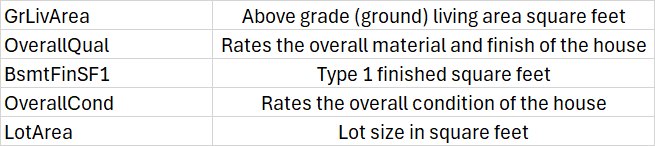

#### Some of the negative variable which significantly affect the prices are as below

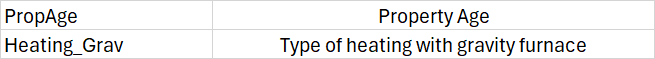


### Q2 :: How well those variables describe the price of a house?

In [124]:
betas

Ridge     Lasso
MSSubClass            -0.012671 -0.006394
LotFrontage            0.016388  0.008493
LotArea                0.051826  0.064663
OverallQual            0.111022  0.156332
OverallCond            0.080101  0.108017
MasVnrArea             0.011053  0.000000
BsmtFinSF1             0.073755  0.080970
BsmtFinSF2             0.017631  0.020913
BsmtUnfSF              0.048636  0.044135
1stFlrSF               0.097782  0.025017
2ndFlrSF               0.053064  0.000000
LowQualFinSF           0.000000  0.000000
GrLivArea              0.119076  0.270731
BsmtFullBath           0.018345  0.019012
BsmtHalfBath           0.004241  0.000000
FullBath               0.055674  0.038001
HalfBath               0.025325  0.018308
BedroomAbvGr           0.025466  0.000000
KitchenAbvGr           0.000000  0.000000
Fireplaces             0.012117  0.000000
GarageArea             0.058116  0.059004
WoodDeckSF             0.019995  0.016246
OpenPorchSF            0.017002  0.009000
EnclosedPorch          0.011709  0.009798
3SsnPorch              0.000000  0.000000
ScreenPorch            0.039097  0.041936
PoolArea               0.000000  0.000000
MiscVal                0.000000  0.000000
PropAge               -0.051534 -0.090488
MSZoning_FV            0.013949  0.003799
MSZoning_RH            0.006186  0.000000
MSZoning_RL            0.019664  0.012819
MSZoning_RM            0.002085 -0.003712
LotShape_IR2          -0.001769 -0.000000
LotShape_IR3           0.012459  0.001047
LotShape_Reg           0.001034  0.000732
LandContour_HLS        0.012124  0.007194
LandContour_Low        0.002133  0.000000
LandContour_Lvl        0.010053  0.010189
LotConfig_CulDSac      0.006975  0.004830
LotConfig_FR2         -0.016448 -0.005754
LotConfig_FR3         -0.003986 -0.000000
LotConfig_Inside      -0.006056 -0.004841
LandSlope_Mod         -0.004025 -0.000000
LandSlope_Sev         -0.022277 -0.004573
Neighborhood_Blueste  -0.004566 -0.000000
Neighborhood_BrDale   -0.011144 -0.000000
Neighborhood_BrkSide   0.009229  0.015378
Neighborhood_ClearCr   0.000469  0.000000
Neighborhood_CollgCr  -0.009500 -0.001516
Neighborhood_Crawfor   0.051669  0.056530
Neighborhood_Edwards  -0.024168 -0.014813
Neighborhood_Gilbert  -0.010592 -0.000000
Neighborhood_IDOTRR   -0.005828  0.000000
Neighborhood_MeadowV  -0.044385 -0.029889
Neighborhood_Mitchel  -0.015997 -0.010543
Neighborhood_NAmes    -0.010965 -0.002020
Neighborhood_NPkVill   0.012709  0.000000
Neighborhood_NWAmes   -0.002781  0.000000
Neighborhood_NoRidge   0.016937  0.016199
Neighborhood_NridgHt   0.023773  0.026634
Neighborhood_OldTown  -0.008065 -0.000643
Neighborhood_SWISU    -0.013996 -0.000168
Neighborhood_Sawyer   -0.001234  0.003309
Neighborhood_SawyerW  -0.002279  0.000000
Neighborhood_Somerst   0.019734  0.030360
Neighborhood_StoneBr   0.047927  0.048719
Neighborhood_Timber   -0.009498 -0.000921
Neighborhood_Veenker   0.009794  0.003191
Condition1_Feedr       0.007809  0.000674
Condition1_Norm        0.021928  0.017769
Condition1_PosA        0.004792 -0.000000
Condition1_PosN        0.006172  0.000000
Condition1_RRAe       -0.011968 -0.004700
Condition1_RRAn        0.008263  0.001149
Condition1_RRNe        0.001900  0.000000
Condition1_RRNn        0.012985  0.000000
Condition2_Norm       -0.002553  0.000000
Condition2_PosN       -0.006569 -0.000000
Condition2_RRNn       -0.006029 -0.000000
BldgType_2fmCon       -0.000371 -0.000000
BldgType_Duplex       -0.001314  0.000000
BldgType_Twnhs        -0.020570 -0.023563
BldgType_TwnhsE       -0.011895 -0.010171
HouseStyle_1.5Unf      0.008047  0.000000
HouseStyle_1Story      0.005515  0.004974
HouseStyle_2.5Fin      0.000000  0.000000
HouseStyle_2.5Unf      0.005093  0.000000
HouseStyle_2Story      0.001916 -0.000000
HouseStyle_SFoyer      0.006775  0.003771
HouseStyle_SLvl        0.004175  0.001286
RoofStyle_Gable       -0.008495 -0.000000
RoofStyle_Gambrel      0.009707  0.004043
RoofStyle_Hip         -0.005934 -0.000000
RoofStyle_Mansard      0.009331  0.0

### Q3 :: Optimum value for Ridge and Lasso ?


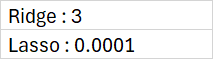

# PART II - Subjective Question
__________________________________________________

### Double the value of alpha for Ridge

In [125]:

alpha = 3 * 2
ridge_2 = Ridge(alpha=alpha)

ridge_2.fit(X_train, y_train)
ridge_2.coef_

array([-1.49684578e-02,  1.94994724e-02,  4.32289524e-02,  9.44034343e-02,
        6.44902428e-02,  1.43630804e-02,  6.49842294e-02,  1.28908922e-02,
        4.24689593e-02,  8.66002938e-02,  4.62901758e-02,  0.00000000e+00,
        1.05080855e-01,  1.77410650e-02,  3.73686504e-03,  5.39186729e-02,
        2.32166561e-02,  2.81126550e-02,  0.00000000e+00,  1.42754469e-02,
        5.57910457e-02,  1.92227473e-02,  1.85780663e-02,  9.56960192e-03,
        0.00000000e+00,  3.32655407e-02,  0.00000000e+00,  0.00000000e+00,
       -3.73549991e-02,  1.09618951e-02,  2.29290383e-03,  1.65984071e-02,
       -5.13442284e-03, -1.29554438e-03,  9.27656685e-03, -5.57211817e-05,
        9.54903689e-03, -2.46721981e-04,  9.11417345e-03,  7.12025729e-03,
       -1.47398062e-02, -1.88321036e-03, -6.23233369e-03, -2.14302011e-03,
       -1.69545166e-02, -2.33880208e-03, -7.87856292e-03,  6.86796399e-03,
        1.53039348e-03, -9.86712191e-03,  4.64570425e-02, -2.45682343e-02,
       -1.35251824e-02, -

In [126]:
# ridge model parameters
model_parameters = list(ridge_2.coef_)
model_parameters.insert(0, ridge_2.intercept_)
model_parameters = [round(X_train, 4) for X_train in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.2079),
 ('MSSubClass', -0.015),
 ('LotFrontage', 0.0195),
 ('LotArea', 0.0432),
 ('OverallQual', 0.0944),
 ('OverallCond', 0.0645),
 ('MasVnrArea', 0.0144),
 ('BsmtFinSF1', 0.065),
 ('BsmtFinSF2', 0.0129),
 ('BsmtUnfSF', 0.0425),
 ('1stFlrSF', 0.0866),
 ('2ndFlrSF', 0.0463),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.1051),
 ('BsmtFullBath', 0.0177),
 ('BsmtHalfBath', 0.0037),
 ('FullBath', 0.0539),
 ('HalfBath', 0.0232),
 ('BedroomAbvGr', 0.0281),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', 0.0143),
 ('GarageArea', 0.0558),
 ('WoodDeckSF', 0.0192),
 ('OpenPorchSF', 0.0186),
 ('EnclosedPorch', 0.0096),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0333),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('PropAge', -0.0374),
 ('MSZoning_FV', 0.011),
 ('MSZoning_RH', 0.0023),
 ('MSZoning_RL', 0.0166),
 ('MSZoning_RM', -0.0051),
 ('LotShape_IR2', -0.0013),
 ('LotShape_IR3', 0.0093),
 ('LotShape_Reg', -0.0001),
 ('LandContour_HLS', 0.0095),
 ('LandContour_Low', -0.0002),
 ('LandContour_Lvl', 0.

In [127]:
# Ridge Regression -- prediction
y_train_pred_ridge_2 = ridge_2.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_ridge_2))
y_test_pred_ridge_2 = ridge_2.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge_2))

0.9448745868130328
0.89048748109571


In [128]:
# Creating a dataframe for the coefficients obtained from Ridge
mod_param = list(zip(cols, model_parameters))
param = pd.DataFrame(mod_param)
param.columns = ['Variable', 'Coeff']

# sort the coefficients in ascending order
param = param.sort_values((['Coeff']), axis = 0, ascending = False)

# Chose variables whose coefficients are non-zero
final_params_ridge = pd.DataFrame(param[(param['Coeff'] != 0)])
final_params_ridge

Variable   Coeff
0                 constant  0.2079
13               GrLivArea  0.1051
4              OverallQual  0.0944
10                1stFlrSF  0.0866
7               BsmtFinSF1  0.0650
5              OverallCond  0.0645
21              GarageArea  0.0558
16                FullBath  0.0539
51    Neighborhood_Crawfor  0.0465
11                2ndFlrSF  0.0463
3                  LotArea  0.0432
67    Neighborhood_StoneBr  0.0431
9                BsmtUnfSF  0.0425
26             ScreenPorch  0.0333
18            BedroomAbvGr  0.0281
226   SaleCondition_Normal  0.0267
188         Functional_Typ  0.0252
61    Neighborhood_NridgHt  0.0240
167           Heating_GasW  0.0238
101    Exterior1st_BrkFace  0.0236
17                HalfBath  0.0232
138       Foundation_PConc  0.0205
220           SaleType_New  0.0203
146            BsmtCond_Gd  0.0202
2              LotFrontage  0.0195
22              WoodDeckSF  0.0192
71         Condition1_Norm  0.0187
23             OpenPorchSF  0.0186
149            BsmtCond_TA  0.0184
14            BsmtFullBath  0.0177
60    Neighborhood_NoRidge  0.0175
66    Neighborhood_Somerst  0.0174
32             MSZoning_RL  0.0166
227  SaleCondition_Partial  0.0159
6               MasVnrArea  0.0144
20              Fireplaces  0.0143
150        BsmtExposure_Gd  0.0142
130       MasVnrType_Stone  0.0137
8               BsmtFinSF2  0.0129
194      GarageType_Attchd  0.0119
215           SaleType_CWD  0.0117
126    Exterior2nd_Wd Sdng  0.0117
207          GarageQual_TA  0.0117
166           Heating_GasA  0.0114
96          RoofStyle_Shed  0.0112
196     GarageType_BuiltIn  0.0110
30             MSZoning_FV  0.0110
98        RoofMatl_WdShake  0.0100
216           SaleType_Con  0.0097
24           EnclosedPorch  0.0096
37         LandContour_HLS  0.0095
175           CentralAir_Y  0.0094
93       RoofStyle_Gambrel  0.0094
35            LotShape_IR3  0.0093
39         LandContour_Lvl  0.0091
185        Functional_Min2  0.0090
140       Foundation_Stone  0.0090
128     MasVnrType_BrkFace  0.0089
139        Foundation_Slab  0.0087
69    Neighborhood_Veenker  0.0086
184        Functional_Min1  0.0084
95       RoofStyle_Mansard  0.0083
58    Neighborhood_NPkVill  0.0077
125    Exterior2nd_VinylSd  0.0073
161       BsmtFinType2_GLQ  0.0072
109     Exterior1st_Stucco  0.0072
218         SaleType_ConLI  0.0072
40       LotConfig_CulDSac  0.0071
123      Exterior2nd_Stone  0.0071
77         Condition1_RRNn  0.0070
223  SaleCondition_AdjLand  0.0069
48    Neighborhood_BrkSide  0.0069
198      GarageType_Detchd  0.0067
170           Heating_Wall  0.0055
155       BsmtFinType1_GLQ  0.0053
75         Condition1_RRAn  0.0052
209          GarageCond_Gd  0.0047
85       HouseStyle_1.5Unf  0.0047
211          GarageCond_Po  0.0045
212          GarageCond_TA  0.0043
70        Condition1_Feedr  0.0042
112    Exterior1st_WdShing  0.0041
88       HouseStyle_2.5Unf  0.0040
204          GarageQual_Gd  0.0040
115    Exterior2nd_BrkFace  0.0038
73         Condition1_PosN  0.0038
15            BsmtHalfBath  0.0037
72         Condition1_PosA  0.0036
89       HouseStyle_2Story  0.0035
129        MasVnrType_None  0.0033
108      Exterior1st_Stone  0.0033
137      Foundation_CBlock  0.0031
119    Exterior2nd_ImStucc  0.0028
106    Exterior1st_MetalSd  0.0025
217         SaleType_ConLD  0.0023
31             MSZoning_RH  0.0023
120    Exterior2nd_MetalSd  0.0022
103    Exterior1st_CemntBd  0.0020
86       HouseStyle_1Story  0.0019
136           ExterCond_TA  0.0019
162       BsmtFinType2_LwQ  0.0018
141        Foundation_Wood  0.0018
90       HouseStyle_SFoyer  0.0017
49    Neighborhood_ClearCr  0.0015
214           PavedDrive_Y  0.0008
91         HouseStyle_SLvl  0.0008
190         FireplaceQu_Gd  0.0006
118    Exterior2nd_HdBoard  0.0005
81         BldgType_2fmCon  0.0004
105    Exterior1st_ImStucc  0.0004
179       Electrical_SBrkr  0.0001
36            LotShape_Reg -0.0001
38         LandContour_Low -0.0002
76         Condition1_RRNe -

In [129]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_ridge_2)))

RMSE : 0.048938397948385864


### Double the value of alpha for Lasso

In [130]:
# At alpha = 0.0001 * 2

alpha = 0.0001 * 2
lasso_2 = Lasso(alpha=alpha)

lasso_2.fit(X_train, y_train)
lasso_2.coef_

array([-0.01027128,  0.00932289,  0.05435995,  0.16653712,  0.10250399,
        0.        ,  0.07350612,  0.00793716,  0.03116692,  0.03795806,
        0.        ,  0.        ,  0.27661593,  0.01941949,  0.        ,
        0.03118679,  0.01490059,  0.        ,  0.        ,  0.        ,
        0.06449711,  0.01187773,  0.00607366,  0.00084693,  0.        ,
        0.03435819,  0.        ,  0.        , -0.07585686,  0.        ,
       -0.        ,  0.00828862, -0.01124362,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.00638999,  0.00348957,
       -0.        , -0.        , -0.00420763, -0.        , -0.        ,
       -0.        , -0.        ,  0.00969828,  0.        , -0.        ,
        0.04869643, -0.0144813 , -0.        ,  0.        , -0.01942075,
       -0.00485362, -0.00136219,  0.        ,  0.        ,  0.01183647,
        0.02585812, -0.        , -0.        ,  0.00144811, -0.        ,
        0.02722253,  0.04254898, -0.        ,  0.        ,  0.  

In [131]:
# lasso model parameters
model_parameters = list(lasso_2.coef_ )
model_parameters.insert(0, lasso_2.intercept_)
model_parameters = [round(X_train, 4) for X_train in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.1226),
 ('MSSubClass', -0.0103),
 ('LotFrontage', 0.0093),
 ('LotArea', 0.0544),
 ('OverallQual', 0.1665),
 ('OverallCond', 0.1025),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0735),
 ('BsmtFinSF2', 0.0079),
 ('BsmtUnfSF', 0.0312),
 ('1stFlrSF', 0.038),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.2766),
 ('BsmtFullBath', 0.0194),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0312),
 ('HalfBath', 0.0149),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', 0.0),
 ('GarageArea', 0.0645),
 ('WoodDeckSF', 0.0119),
 ('OpenPorchSF', 0.0061),
 ('EnclosedPorch', 0.0008),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0344),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('PropAge', -0.0759),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0083),
 ('MSZoning_RM', -0.0112),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0064),
 ('LotConfig_CulDSac', 0.00

In [132]:
# Lasso Regression -- Prediction
y_train_pred_lasso_2 = lasso_2.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso_2))
y_test_pred_lasso_2 = lasso_2.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso_2))

0.9440723469158226
0.9051581973306738


In [133]:
# Creating a dataframe for the coefficients obtained from Lasso
mod_param = list(zip(cols, model_parameters))
param = pd.DataFrame(mod_param)
param.columns = ['Variable', 'Coeff']

# sort the coefficients in ascending order
param = param.sort_values((['Coeff']), axis = 0, ascending = False)

# Chose variables whose coefficients are non-zero
final_params_lasso = pd.DataFrame(param[(param['Coeff'] != 0)])
final_params_lasso

Variable   Coeff
13              GrLivArea  0.2766
4             OverallQual  0.1665
0                constant  0.1226
5             OverallCond  0.1025
7              BsmtFinSF1  0.0735
21             GarageArea  0.0645
3                 LotArea  0.0544
51   Neighborhood_Crawfor  0.0487
220          SaleType_New  0.0426
67   Neighborhood_StoneBr  0.0425
10               1stFlrSF  0.0380
26            ScreenPorch  0.0344
16               FullBath  0.0312
9               BsmtUnfSF  0.0312
188        Functional_Typ  0.0296
226  SaleCondition_Normal  0.0274
66   Neighborhood_Somerst  0.0272
61   Neighborhood_NridgHt  0.0259
101   Exterior1st_BrkFace  0.0197
14           BsmtFullBath  0.0194
71        Condition1_Norm  0.0167
149           BsmtCond_TA  0.0161
138      Foundation_PConc  0.0156
17               HalfBath  0.0149
150       BsmtExposure_Gd  0.0127
146           BsmtCond_Gd  0.0126
207         GarageQual_TA  0.0123
22             WoodDeckSF  0.0119
60   Neighborhood_NoRidge  0.0118
48   Neighborhood_BrkSide  0.0097
2             LotFrontage  0.0093
106   Exterior1st_MetalSd  0.0085
32            MSZoning_RL  0.0083
8              BsmtFinSF2  0.0079
125   Exterior2nd_VinylSd  0.0077
39        LandContour_Lvl  0.0064
23            OpenPorchSF  0.0061
130      MasVnrType_Stone  0.0057
212         GarageCond_TA  0.0046
136          ExterCond_TA  0.0045
126   Exterior2nd_Wd Sdng  0.0037
194     GarageType_Attchd  0.0037
185       Functional_Min2  0.0036
40      LotConfig_CulDSac  0.0035
175          CentralAir_Y  0.0035
167          Heating_GasW  0.0033
86      HouseStyle_1Story  0.0026
155      BsmtFinType1_GLQ  0.0021
196    GarageType_BuiltIn  0.0021
128    MasVnrType_BrkFace  0.0021
64    Neighborhood_Sawyer  0.0014
24          EnclosedPorch  0.0008
127   Exterior2nd_Wd Shng -0.0003
129       MasVnrType_None -0.0004
210       GarageCond_None -0.0004
153     BsmtExposure_None -0.0006
202      GarageFinish_Unf -0.0006
57     Neighborhood_NAmes -0.0014
151       BsmtExposure_Mn -0.0016
152       BsmtExposure_No -0.0027
122   Exterior2nd_Plywood -0.0029
159      BsmtFinType1_Unf -0.0032
205       GarageQual_None -0.0033
156      BsmtFinType1_LwQ -0.0035
43       LotConfig_Inside -0.0042
56   Neighborhood_Mitchel -0.0049
222           SaleType_WD -0.0054
172          HeatingQC_Gd -0.0057
84        BldgType_TwnhsE -0.0058
133          ExterQual_TA -0.0064
145           BsmtQual_TA -0.0065
199       GarageType_None -0.0067
143           BsmtQual_Gd -0.0067
225  SaleCondition_Family -0.0081
174          HeatingQC_TA -0.0093
171          HeatingQC_Fa -0.0094
1              MSSubClass -0.0103
33            MSZoning_RM -0.0112
191      FireplaceQu_None -0.0124
181        KitchenQual_Gd -0.0129
97       RoofMatl_Tar&Grv -0.0130
52   Neighborhood_Edwards -0.0145
83         BldgType_Twnhs -0.0166
182        KitchenQual_TA -0.0168
55   Neighborhood_MeadowV -0.0194
180        KitchenQual_Fa -0.0211
183       Functional_Maj2 -0.0320
168          Heating_Grav -0.0435
29                PropAge -0.0759

In [134]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_lasso_2)))

RMSE : 0.04554259406730298


### Recreating model after removing 5 most important predictor from lasso

In [135]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=227)

In [136]:
X_train.shape

(885, 227)

In [137]:
X_train_1 = X_train.drop(["GrLivArea","OverallQual","BsmtFinSF1","OverallCond","LotArea"],axis=1)
X_test_1 = X_test.drop(["GrLivArea","OverallQual","BsmtFinSF1","OverallCond","LotArea"],axis=1)

In [138]:
X_train_1.columns

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)

In [139]:
X_train_1.shape

(885, 222)

In [140]:
X_test_1.columns

Index(['MSSubClass', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)

In [141]:
# At alpha = 0.0001

alpha = 0.0001
lasso_3 = Lasso(alpha=alpha)

lasso_3.fit(X_train_1, y_train)
lasso_3.coef_

array([-7.02619450e-03,  1.91036143e-02,  2.35466516e-03, -0.00000000e+00,
       -4.71041087e-03,  3.64148071e-01,  1.46955793e-01,  0.00000000e+00,
        2.32394827e-02,  1.41346572e-02,  4.41382245e-02,  1.60152058e-02,
        0.00000000e+00,  0.00000000e+00,  1.23365695e-02,  7.68085814e-02,
        2.28013529e-02,  1.56628983e-02,  4.07968398e-03,  0.00000000e+00,
        3.92460610e-02,  0.00000000e+00,  0.00000000e+00, -5.08929552e-02,
        6.74326593e-03,  0.00000000e+00,  1.37590463e-02, -0.00000000e+00,
        0.00000000e+00,  5.09140363e-03,  2.28687772e-04,  1.30374254e-02,
       -0.00000000e+00,  9.05600425e-03,  7.43275174e-03, -1.20333361e-02,
        0.00000000e+00, -6.80503268e-03, -1.99288531e-03, -2.01181976e-02,
       -0.00000000e+00, -0.00000000e+00,  1.15912187e-02,  0.00000000e+00,
       -2.34503199e-03,  6.93172605e-02, -2.28944701e-02, -0.00000000e+00,
       -0.00000000e+00, -6.21182511e-02, -9.31320586e-03, -3.37223015e-03,
        0.00000000e+00,  

In [142]:
# lasso model parameters
model_parameters = list(lasso_3.coef_ )
model_parameters.insert(0, lasso_3.intercept_)
model_parameters = [round(X_train_1, 4) for X_train_1 in model_parameters]
cols = X_train_1.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.2658),
 ('MSSubClass', -0.007),
 ('LotFrontage', 0.0191),
 ('MasVnrArea', 0.0024),
 ('BsmtFinSF2', -0.0),
 ('BsmtUnfSF', -0.0047),
 ('1stFlrSF', 0.3641),
 ('2ndFlrSF', 0.147),
 ('LowQualFinSF', 0.0),
 ('BsmtFullBath', 0.0232),
 ('BsmtHalfBath', 0.0141),
 ('FullBath', 0.0441),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.0),
 ('Fireplaces', 0.0123),
 ('GarageArea', 0.0768),
 ('WoodDeckSF', 0.0228),
 ('OpenPorchSF', 0.0157),
 ('EnclosedPorch', 0.0041),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0392),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('PropAge', -0.0509),
 ('MSZoning_FV', 0.0067),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0138),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0051),
 ('LotShape_Reg', 0.0002),
 ('LandContour_HLS', 0.013),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.0091),
 ('LotConfig_CulDSac', 0.0074),
 ('LotConfig_FR2', -0.012),
 ('LotConfig_FR3', 0.0),
 ('LotConfig_Inside', -0.0068),
 ('LandSlope_Mod',

In [143]:
# Lasso Regression -- Prediction
y_train_pred_lasso_3 = lasso_3.predict(X_train_1)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred_lasso_3))
y_test_pred_lasso_3 = lasso_3.predict(X_test_1)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso_3))

0.9376006394345537
0.87784538228483


In [144]:
# Creating a dataframe for the coefficients obtained from Lasso
mod_param = list(zip(cols, model_parameters))
param = pd.DataFrame(mod_param)
param.columns = ['Variable', 'Coeff']

# sort the coefficients in ascending order
param = param.sort_values((['Coeff']), axis = 0, ascending = False)

# Chose variables whose coefficients are non-zero
final_params_lasso = pd.DataFrame(param[(param['Coeff'] != 0)])
final_params_lasso

Variable   Coeff
6                 1stFlrSF  0.3641
0                 constant  0.2658
7                 2ndFlrSF  0.1470
16              GarageArea  0.0768
46    Neighborhood_Crawfor  0.0693
62    Neighborhood_StoneBr  0.0618
11                FullBath  0.0441
21             ScreenPorch  0.0392
183         Functional_Typ  0.0386
56    Neighborhood_NridgHt  0.0371
221   SaleCondition_Normal  0.0339
141            BsmtCond_Gd  0.0332
61    Neighborhood_Somerst  0.0287
144            BsmtCond_TA  0.0277
91          RoofStyle_Shed  0.0244
215           SaleType_New  0.0233
9             BsmtFullBath  0.0232
17              WoodDeckSF  0.0228
64    Neighborhood_Veenker  0.0215
222  SaleCondition_Partial  0.0209
189      GarageType_Attchd  0.0207
96     Exterior1st_BrkFace  0.0202
55    Neighborhood_NoRidge  0.0201
2              LotFrontage  0.0191
145        BsmtExposure_Gd  0.0190
66         Condition1_Norm  0.0181
12                HalfBath  0.0160
202          GarageQual_TA  0.0160
18             OpenPorchSF  0.0157
10            BsmtHalfBath  0.0141
27             MSZoning_RL  0.0138
133       Foundation_PConc  0.0135
162           Heating_GasW  0.0135
191     GarageType_BuiltIn  0.0132
121    Exterior2nd_Wd Sdng  0.0132
32         LandContour_HLS  0.0130
88       RoofStyle_Gambrel  0.0125
210           SaleType_CWD  0.0123
15              Fireplaces  0.0123
193      GarageType_Detchd  0.0119
43    Neighborhood_BrkSide  0.0116
125       MasVnrType_Stone  0.0105
170           CentralAir_Y  0.0097
34         LandContour_Lvl  0.0091
35       LotConfig_CulDSac  0.0074
101    Exterior1st_MetalSd  0.0074
150       BsmtFinType1_GLQ  0.0070
70         Condition1_RRAn  0.0068
85       HouseStyle_SFoyer  0.0067
25             MSZoning_FV  0.0067
120    Exterior2nd_VinylSd  0.0062
54     Neighborhood_NWAmes  0.0055
30            LotShape_IR3  0.0051
84       HouseStyle_2Story  0.0051
123     MasVnrType_BrkFace  0.0049
98     Exterior1st_CemntBd  0.0044
19           EnclosedPorch  0.0041
211           SaleType_Con  0.0036
174       Electrical_SBrkr  0.0028
3               MasVnrArea  0.0024
180        Functional_Min2  0.0024
81       HouseStyle_1Story  0.0014
185         FireplaceQu_Gd  0.0008
124        MasVnrType_None  0.0004
31            LotShape_Reg  0.0002
171       Electrical_FuseF -0.0009
197       GarageFinish_Unf -0.0013
99     Exterior1st_HdBoard -0.0014
39           LandSlope_Mod -0.0020
45    Neighborhood_CollgCr -0.0023
153       BsmtFinType1_Rec -0.0025
52      Neighborhood_NAmes -0.0034
155       BsmtFinType2_BLQ -0.0036
217            SaleType_WD -0.0045
127           ExterQual_Gd -0.0047
5                BsmtUnfSF -0.0047
146        BsmtExposure_Mn -0.0048
147        BsmtExposure_No -0.0052
87         RoofStyle_Gable -0.0053
209           PavedDrive_Y -0.0057
117    Exterior2nd_Plywood -0.0057
167           HeatingQC_Gd -0.0057
58      Neighborhood_SWISU -0.0067
198          GarageQual_Fa -0.0067
38        LotConfig_Inside -0.0068
1               MSSubClass -0.0070
122    Exterior2nd_Wd Shng -0.0072
106    Exterior1st_Wd Sdng -0.0074
186       FireplaceQu_None -0.0076
203          GarageCond_Fa -0.0079
159       BsmtFinType2_Rec -0.0083
51    Neighborhood_Mitchel -0.0093
142          BsmtCond_None -0.0099
151       BsmtFinType1_LwQ -0.0104
181         Functional_Mod -0.0110
154       BsmtFinType1_Unf -0.0116
169           HeatingQC_TA -0.0119
36           LotConfig_FR2 -0.0120
166           HeatingQC_Fa -0.0125
220   SaleCondition_Family -0.0133
95     Exterior1st_BrkComm -0.0136
137            BsmtQual_Fa -0.0137
138            BsmtQual_Gd -0.0141
129           ExterCond_Fa -0.0146
140            BsmtQual_TA -0.0181
139          BsmtQual_None -0.0185
128           ExterQual_TA -0.0195
40           LandSlope_Sev -0.0201
79         BldgType_TwnhsE -0.0208
47    Neighborhood_Edwards -0.0229
92        RoofMatl_Tar&Grv -0.0265
148      BsmtExposure_None -0.0266
78          BldgType_Twnhs -0.0269
176         KitchenQual_Gd -